# Метанпромбанк: Анализ оттока клиентов

## Цель проекта
  
Провести анализ оттока клиентов Метанпромбанка в целях сохранения клиентской базы. Выделить сегменты клиентов, склонных уходить из банка чаще, чем в среднем по банку. Разработать рекомендации по снижению оттока этих сегментов и презентовать их отделу маркетинга Метанпромбанка.

## Задачи проекта

### Загрузка и описание данных
  
В рамках данной задачи я планирую загрузить данные из датасета `bank_scrooge.csv`, изучить их в общем виде, понять и описать, за что отвечает каждая колонка

### Предобработка данных
  
В рамках данной задачи я планирую привести названия колонок к общему виду; изучить пропуски в колонках, понять их природу, при необходимости обработать пропуски (удалить либо заменить на среднее/медиану/моду); изучить явные и неявные дубликаты, при необходимости обработать их; закодировать категориальные данные

### Исследовательский анализ данных
  
В рамках данной задачи я планирую изучить распределение данных в каждой колонке в разрезе оттока; поиск и определеные отточных интервалов для непрерывных данных; поиск значений признака с оттоком выше, чем в среднем по банку для категориальных и дискретных данных; провести корреляционный анализ данных по всем столбцам с фокусировкой на оттоке (`churn`) 

### Проверка статистических гипотез
  
В рамках данной задачи я планирую проверить 2 статистические гипотезы:
1) Ho - средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались  
H1 - средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались  
2) Вторая гипотеза будет сформулирована по ходу работу на основе результатов предыдущих шагов

### Подведение промежуточных итогов
  
В рамках данной задачи я планирую написать выводы по результатам исследовательского анализа данных, корреляционного анализа и проверки гипотез, выделить признаки, влияющие на отток клиентов

### Сегментация
  
В рамках данной задачи я планирую выделить не менее 3 неузких (500+ клиентов) сегментов клиентов с оттоком выше, чем в среднем по банку

### Приоритизация сегментов
  
В рамках данной задачи я планирую приоритизировать выделенные сегменты из предыдущего шага в порядке значимости. Признаком, по которому будет определяться уровень значимости, предварительно будет процент оттока, однако в процессе выполнения работы и получения инсайтов этот признак может быть изменен на менее очевидный

### Формирование рекомендаций
  
Формирование конкретных рекомендаций для отдела маркетинга в первую очередь на основе интересов сегментов из предыдущих шагов для того, чтобы снизить их отток 

0. [Презентация](#step0)
1. [Загрузка и описание данных](#step1)
    * [Выводы по разделу](#step1r)
2. [Предобработка данных](#step2)
    * [Выводы по разделу](#step2r)
3. [Исследовательский анализ данных](#step3)
    * [Выводы по разделу](#step3r)
4. [Проверка статистических гипотез](#step4)
    * [Выводы по разделу](#step4r)
5. [Подведение промежуточных итогов](#step5)
6. [Сегментация](#step6)
7. [Приоритизация сегментов](#step7)
8. [Формирование рекомендаций](#step8)

# Презентация<a id="step0"></a> 
  
 - Презентация: <https://drive.google.com/file/d/15Qus39XPjC-PjAdmI8PWApoIOJwWNa0J/view?usp=sharing>

# Загрузка и описание данных<a id="step1"></a> 

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
import math as mth
import scipy.stats as st
!pip install phik
import phik
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 1000)
plt.rcParams["figure.figsize"] = (10,6)

Изучим датасет

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Есть пропуски в `age` и `balance`, типы данных везде указаны верно

In [6]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Можно отметить большую разницу среднего и медианы для `balance`, также есть заметная разница в столбце `EST_SALARY`

In [7]:
data.sample(10, random_state=123)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2656,134388,851.0,Рыбинск,Ж,51.0,3,230610.65,2,0,1,94958.53,0
445,183584,894.0,Ростов,М,64.0,5,1298232.12,1,1,1,170379.85,0
9505,172704,884.0,Ярославль,М,27.0,6,374933.07,4,1,0,49781.47,1
332,224362,839.0,Ярославль,Ж,33.0,1,100936.70,2,1,0,167856.16,0
4168,204923,821.0,Рыбинск,Ж,27.0,5,248616.65,1,1,1,25333.32,0
2364,193490,895.0,Ростов,Ж,76.0,0,NaN,1,0,1,42595.19,0
6097,189636,941.0,Ярославль,М,37.0,2,158296.69,1,1,1,144723.89,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
7752,228106,804.0,Ярославль,Ж,69.0,3,326701.33,2,0,0,54190.79,0
4453,213788,855.0,Ярославль,Ж,57.0,4,1424358.89,3,0,1,151093.73,1


Есть клиенты с наличием операций за какой-то промежуток времени на момент анализа и при этом расторгнувшие договор

`user_id` - идентификатор клиента  
`score` - кредитный рейтинг, чем выше, тем клиент платежеспособнее  
`city` - город, в котором находится филиал банка, в котором открыт договор  
`gender` - пол клиента  
`age` - возраст клиента  
`equity` - аналог `score`, чем выше, тем больше у клиента объектов собственности  
`balance` - баланс на счете  
`products` - количество продуктов, которыми пользуется клиент  
`credit_card` - наличие кредитной карты  
`last_activity` - наличие операций за какой-то промежуток времени на момент анализа  
`est_salary` - оценочный доход клиента  
`churn` - наличие активного договора с клиентом

## Выводы по разделу:  <a id="step1r"></a> 
1) В датасете 10000 строк, есть много пропусков в балансе и немного в возрасте  
2) Заметна большая разница между средним и медианой для баланса  
3) Есть клиенты с наличием операций за какой-то промежуток времени на момент анализа и при этом расторгнувшие договор  
4) Все колонки описаны

# Предобработка данных<a id="step2"></a> 

Переименуем колонки, чтобы привести их к общему виду

In [8]:
data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [12]:
data['age'].isna().sum(), data['balance'].isna().sum()

(26, 2295)

В датасете 26 пропусков в возрасте и 2295 в балансе, добавим дополнительные колонки `age_isna` и `balance_isna`, чтобы их классифицировать, и посмотрим корреляцию  

In [13]:
data['age_isna'] = data['age'].apply(lambda x: 1 if pd.isna(x) else 0)

In [14]:
data['balance_isna'] = data['balance'].apply(lambda x: 1 if pd.isna(x) else 0)

In [15]:
def phik_graph(data, col_exclude=None, interval_cols=None, concentrate=None):
    
    if col_exclude is not None:
        for col in col_exclude:
            if col in data.columns:
                data = data.drop(col, axis=1)
                
    phik_correlation = data.phik_matrix(interval_cols=interval_cols)
    
    if concentrate is not None:
        if concentrate in phik_correlation.index:
            phik_correlation = phik_correlation.loc[[concentrate]]
        else:
            pass
    
    plt.figure(figsize=(8,8))
    sns.heatmap(phik_correlation,
               vmax=1, square=True,
               annot=True, cmap='coolwarm',
               center=0)
    plt.title('Корреляция между столбцами')
    plt.show()

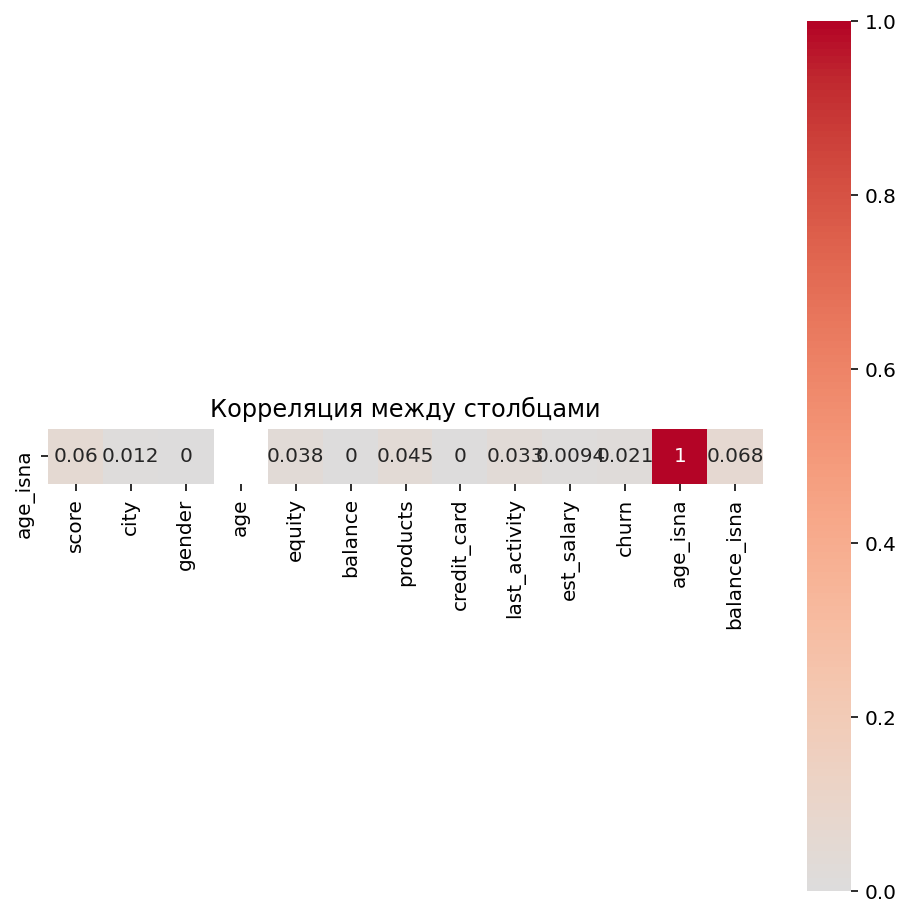

In [16]:
phik_graph(data, ['user_id'], ['score', 'balance', 'est_salary', 'age'], 'age_isna')

Корреляция между пропусками в возрасте и другими столбцами отсутствует, пропусков мало (26 на 10000 строк датасета) => можем классифицировать их как  MCAR (Missing Completely At Random) и отбросить для удобства

In [17]:
data.dropna(subset=['age'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(['age_isna'], axis=1, inplace=True)

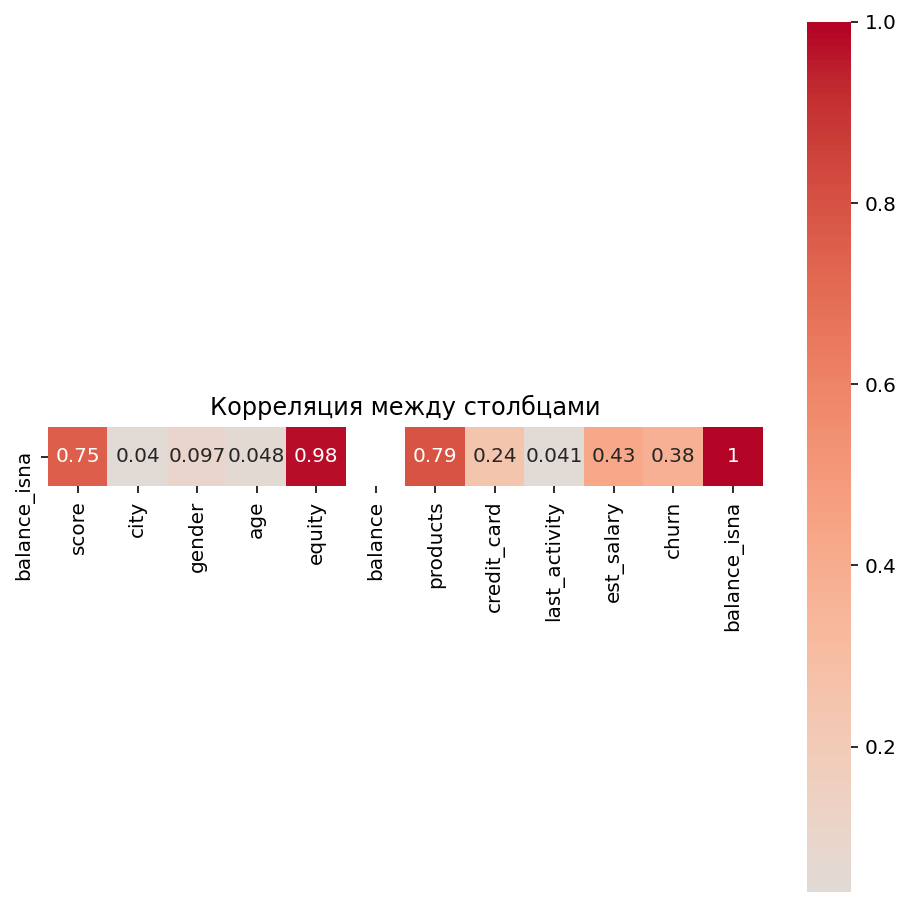

In [19]:
phik_graph(data, ['user_id'], ['score', 'balance', 'est_salary', 'age'], 'balance_isna')

**Высокая корреляция** между пропусками в балансе и кредитным рейтингом, количеством продуктов, **очень высокая корреляция** между пропусками в балансе и баллами собственности. Пропуски можно характеризовать как MNAR (Missing Not At Random), в связи с этим не будем их отбрасывать либо заполнять чем-то и оставим так, как есть

In [20]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isna
8939,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1


Есть 1 клиент с количеством продуктов = 0, вероятнее всего это ошибка, учтем на будущее

In [62]:
data.duplicated().sum()

0

Нет явных дубликатов

In [63]:
data['user_id'].duplicated().sum()

50

В датасете 50 дубликатов по уникальному номеру пользователя, изучим их подробнее

In [64]:
data[data[['user_id']].duplicated(keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isna
1892,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0
7683,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1
4862,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0
7531,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1
5856,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,0
5889,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,1
1410,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1,0
8621,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0,1
9750,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,0
8151,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1,0


Можно сделать вывод, что все клиенты - разные люди, зачастую они имеют разный пол, кредитный рейтинг, баланс, и т.д. Все дубликаты присутствуют в 2 городах: Ярославль и Рыбинск. Можно сделать вывод, у этих городов нет общей базы данных и user_id в них присваевается независимо друг от друга, вследствие чего и возникли дубликаты. Поэтому мы их оставим

## Выводы по разделу:<a id="step2r"></a> 
1) Колонки датасета приведены к общему виду  
2) Отброшено 26 пропусков MCAR в столбце `age`  
3) 50 дубликатов в столбце `user_id` оставлены, т.к. фактически это разные клиенты  
4) Дубликаты вероятнее всего вызваны отсутствием общей БД в городах Ярославль и Рыбинск  
5) 2295 пропусков MNAR в столбце `balance` оставлены

# Исследовательский анализ данных<a id="step3"></a> 

Посмотрим, сколько всего в датасете клиентов с активным договором и клиентов, расторгнувших договор

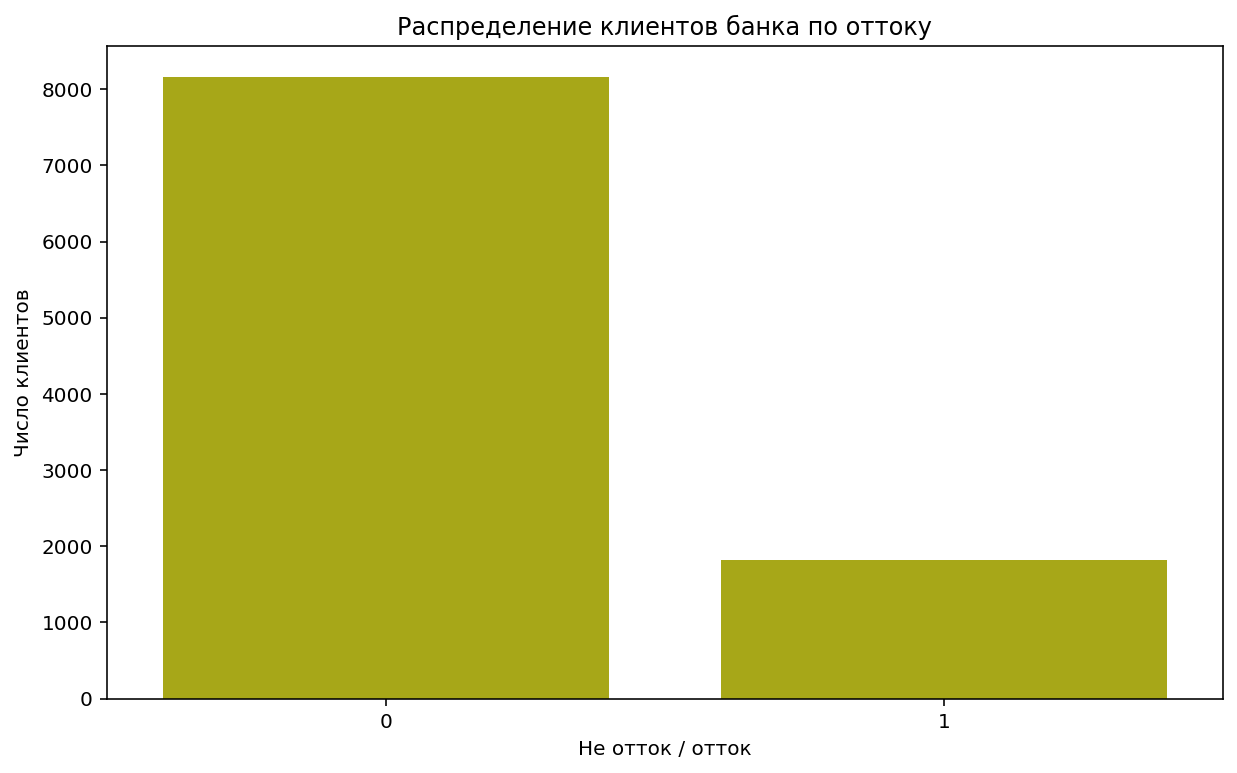

In [21]:
sns.countplot(data=data, x='churn', color='y')
plt.xlabel('Не отток / отток')
plt.ylabel('Число клиентов')
plt.title('Распределение клиентов банка по оттоку')
plt.show()

Напишем 2 функуции для построения графиков. 1 для распредления непрерывных переменных в разрезе оттока, а 2 для распределения среднего уровня оттока для дискретных и категориальных переменных, а также распределения их значений

In [65]:
def cont_graph(data, x, percentile=None, bins=None):
    #Функция для построения графика распределения для непрерывных переменных в разрезе оттока
    try:
        if bins is not None:
            sns.histplot(data=data, x=x, hue='churn', stat='density', common_norm=False, bins=bins)
        else:
            sns.histplot(data=data, x=x, hue='churn', stat='density', common_norm=False)
        plt.title(f'Распределение {x} в разрезе оттока')
        #вводим перцентиль для столбцов, в котором есть крупные выбросы для того, чтобы график был нагляднее
        if percentile is not None: 
            plt.xlim(np.percentile(data[x].dropna(), percentile[0]), np.percentile(data[x].dropna(), percentile[1]))
        plt.show()
    except:
        print('Ошибка')

def disc_graph(data, x):
    #Функция для построения графика распределения среднего уровня оттока для дискретных и категориальных переменных, а также распределения их значений
    try:
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        sns.barplot(data=data, x=x, y='churn', color='y', ax=axs[0])
        axs[0].axhline(y=data['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока по банку')
        axs[0].set_ylabel('Уровень оттока')
        axs[0].set_title(f'Уровень оттока по {x}')
        axs[0].legend()
        
        sns.countplot(data=data, x=x, color='lightgreen', ax=axs[1])
        axs[1].set_xlabel(x)
        axs[1].set_ylabel('Частота')
        axs[1].set_title(f'Распределение {x}')

        plt.show()
    
    except:
        print('Ошибка')


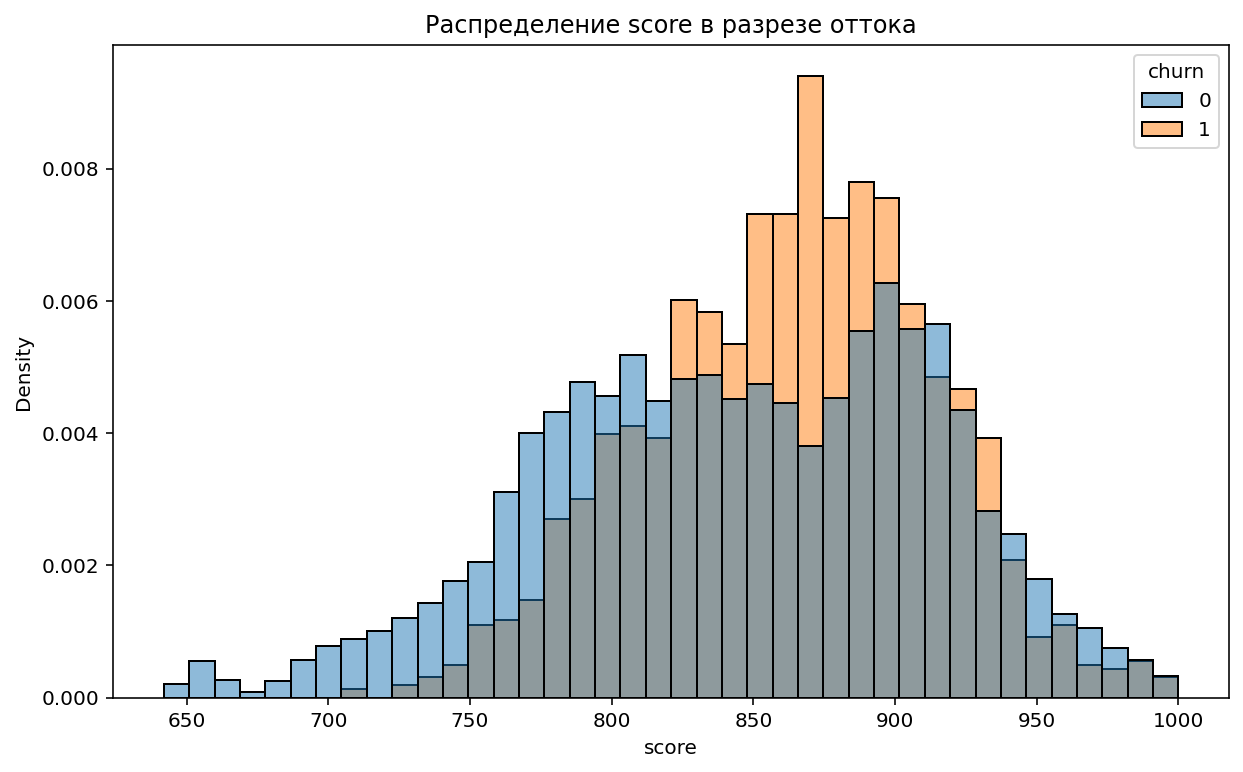

In [66]:
cont_graph(data, 'score')

Визуально, клиенты с кредитным рейтингом 820-910 более склонны к оттоку

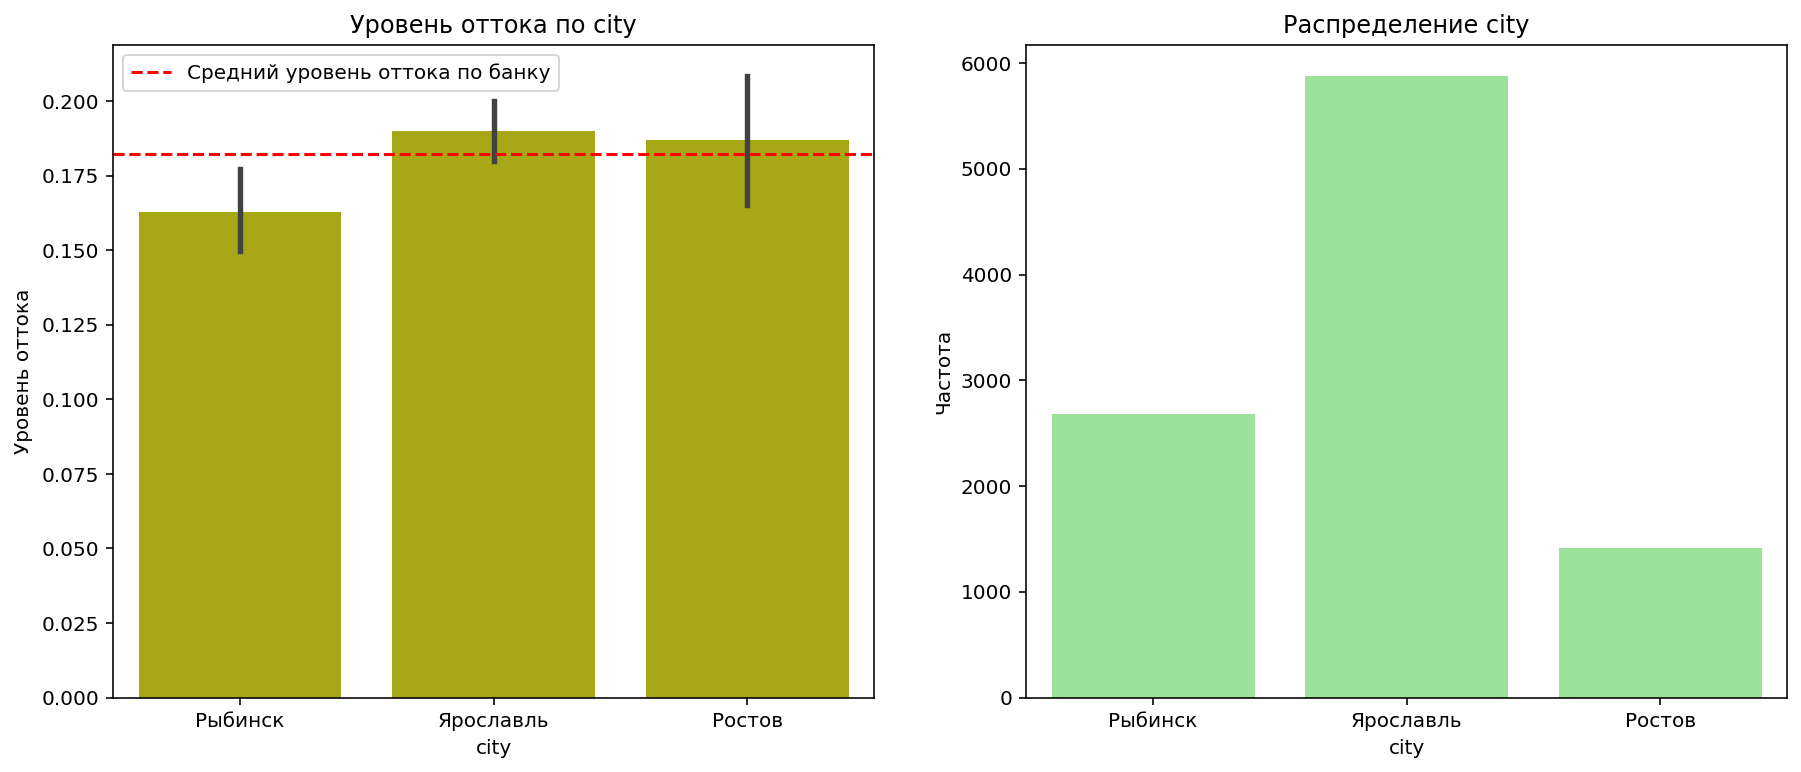

In [67]:
disc_graph(data, 'city')

Визуально, клиенты из Ярославля из Ростова более склонны к оттоку, чем все клиенты в среднем по банку

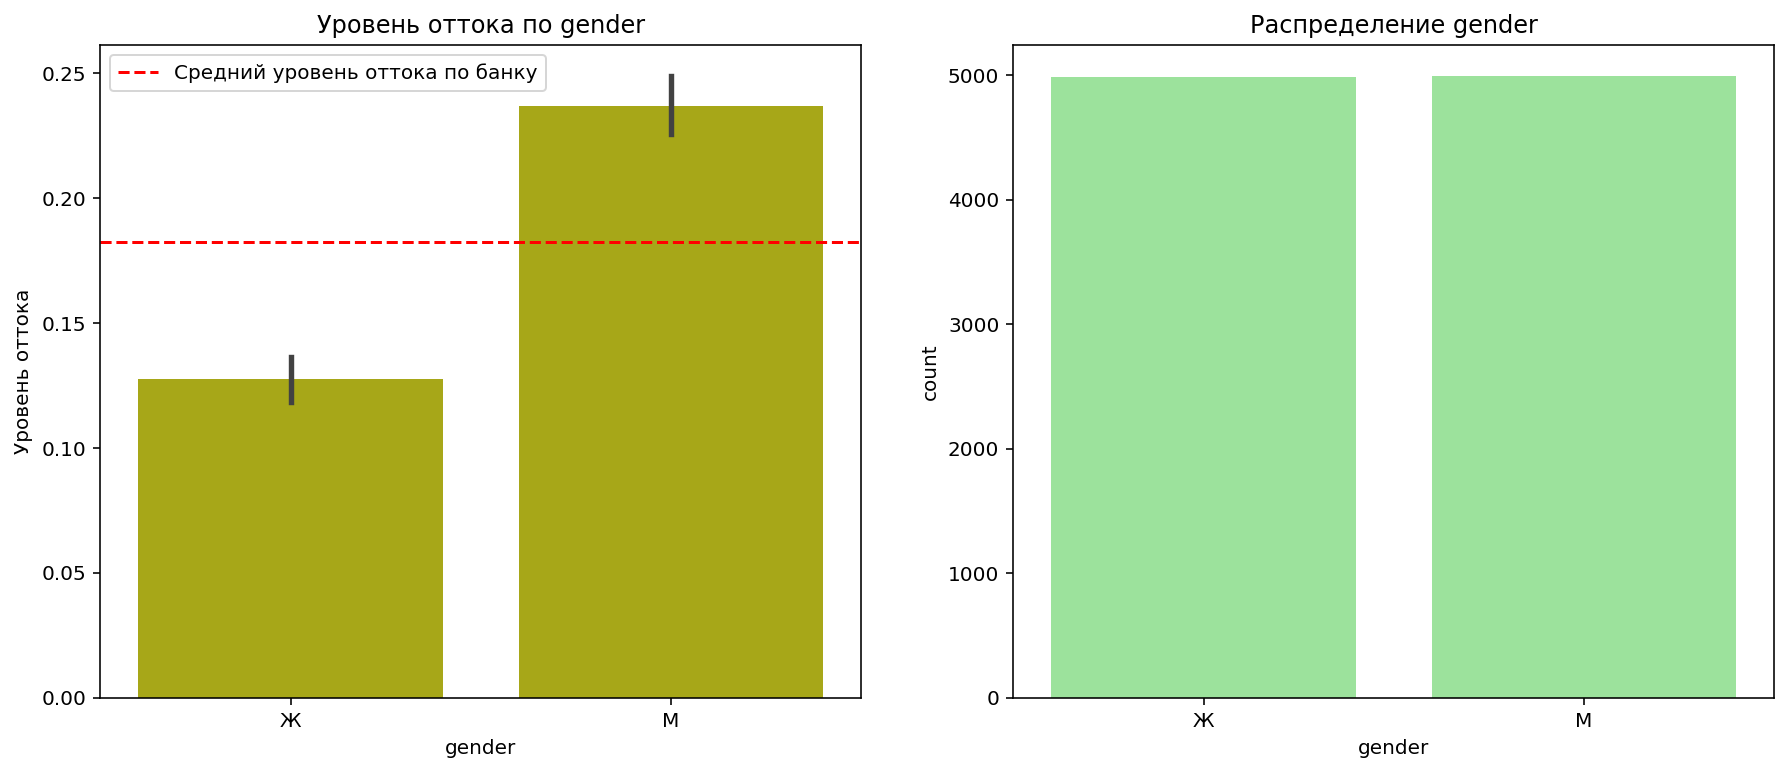

In [25]:
disc_graph(data, 'gender')

Визуально, мужчины более склонны к оттоку, чем все клиенты в среднем по банку

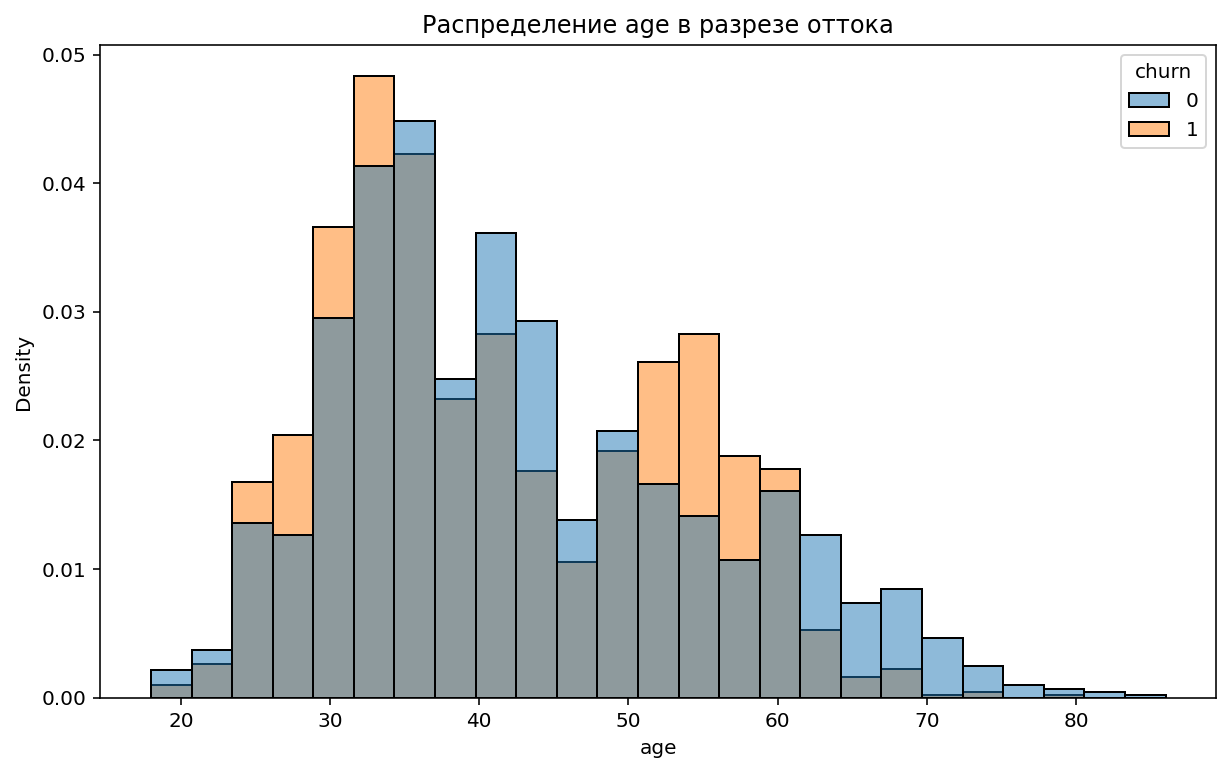

In [26]:
cont_graph(data, 'age', bins=25)

Визуально, возрастные группы 25-35 и 50-60 более склонны к оттоку

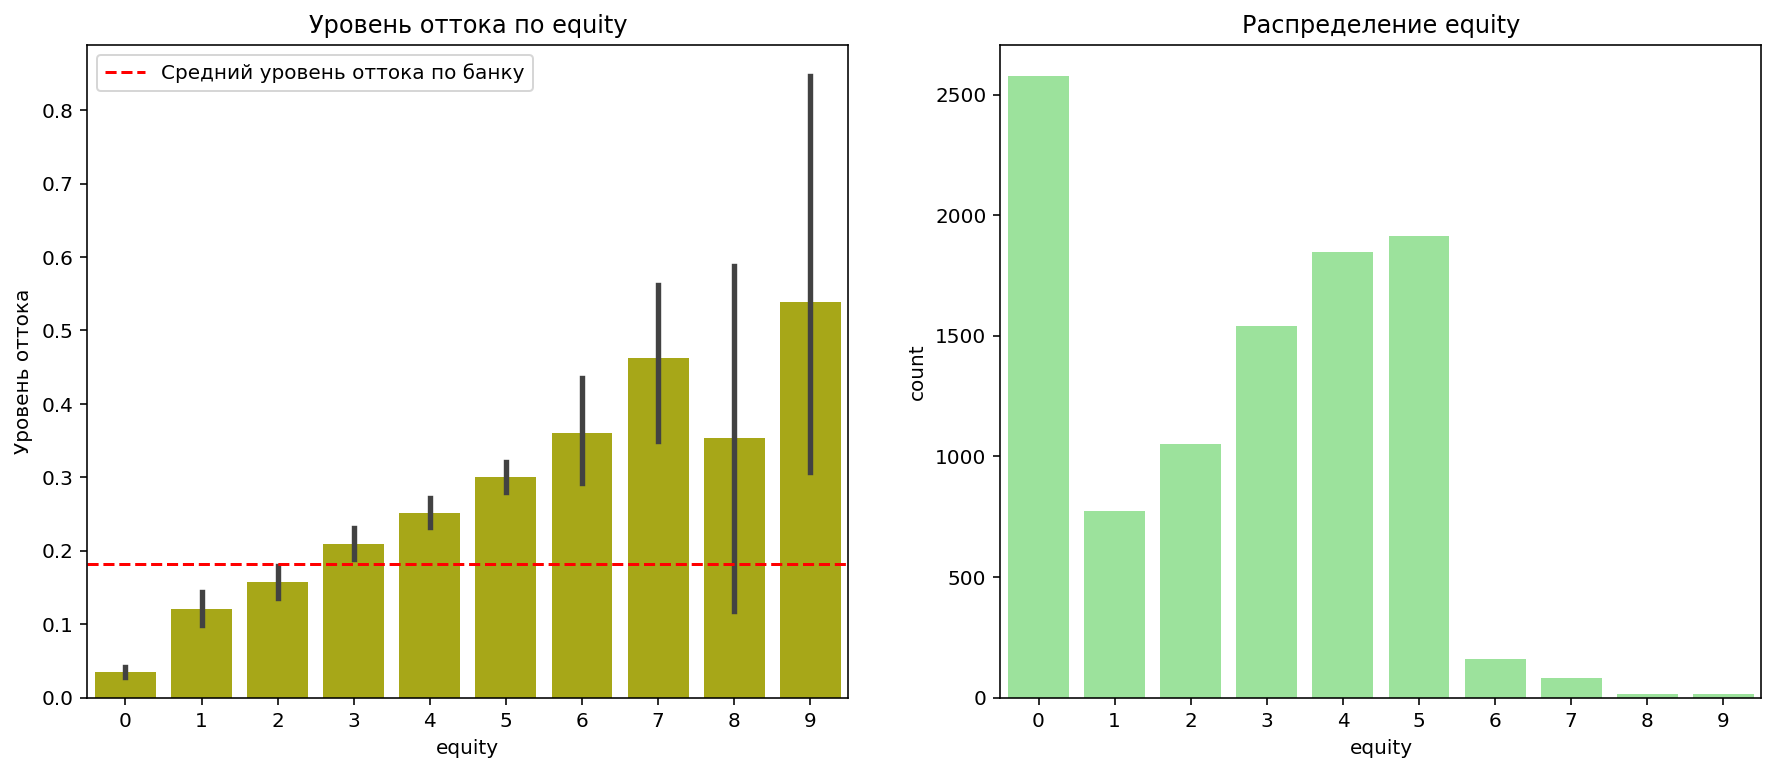

In [27]:
disc_graph(data, 'equity')

Визуально, клиенты с рейтингом объектов собственности от 2 до 9 более склонны к оттоку, чем все клиенты в среднем по банку. Самые отточные клиенты с рейтингом объектов собственности 9, 7 и 6. Не считая 8, чем больше у клиентов объектов собственности, тем более он склонен к оттоку

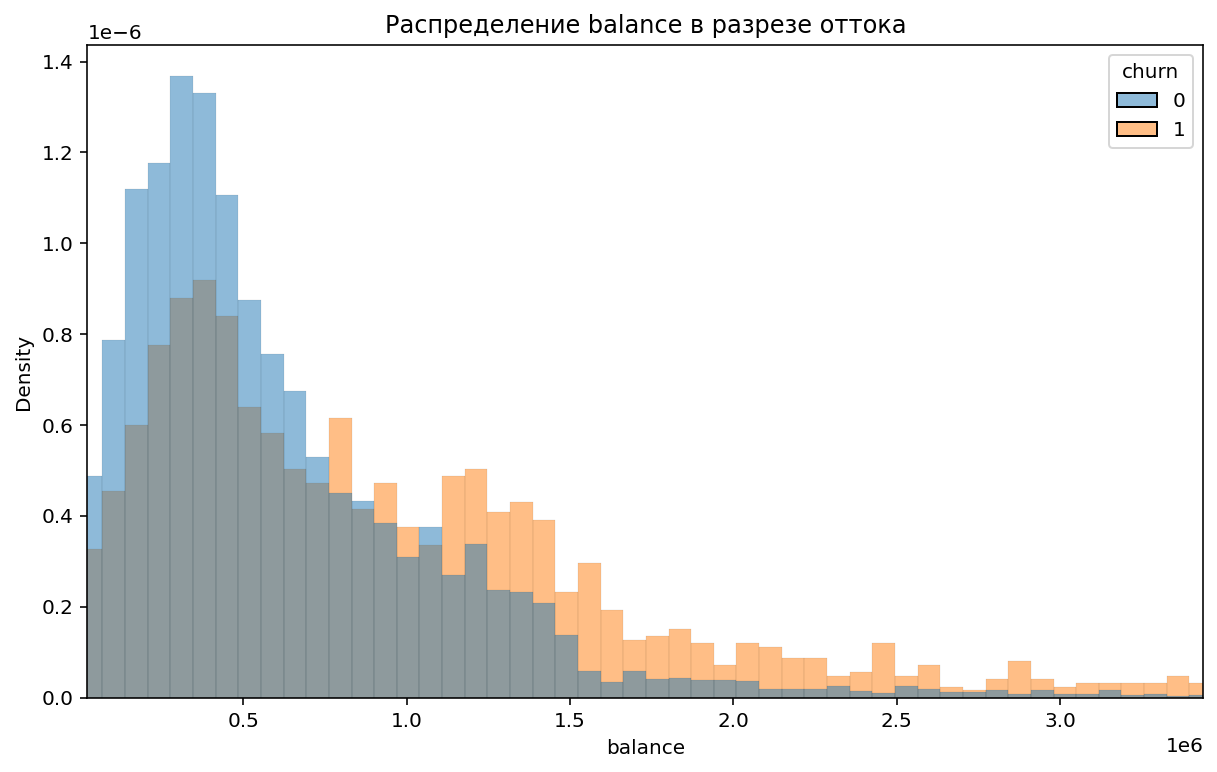

In [28]:
cont_graph(data, 'balance', [1, 98])

Визуально, клиенты с балансом от 700к более склонны к оттоку

На этапе предобработки отметили, что есть лишь 1 клиент, с количеством продуктов = 0, и скорее всего это является ошибкой. Исключим этого клиента из данных

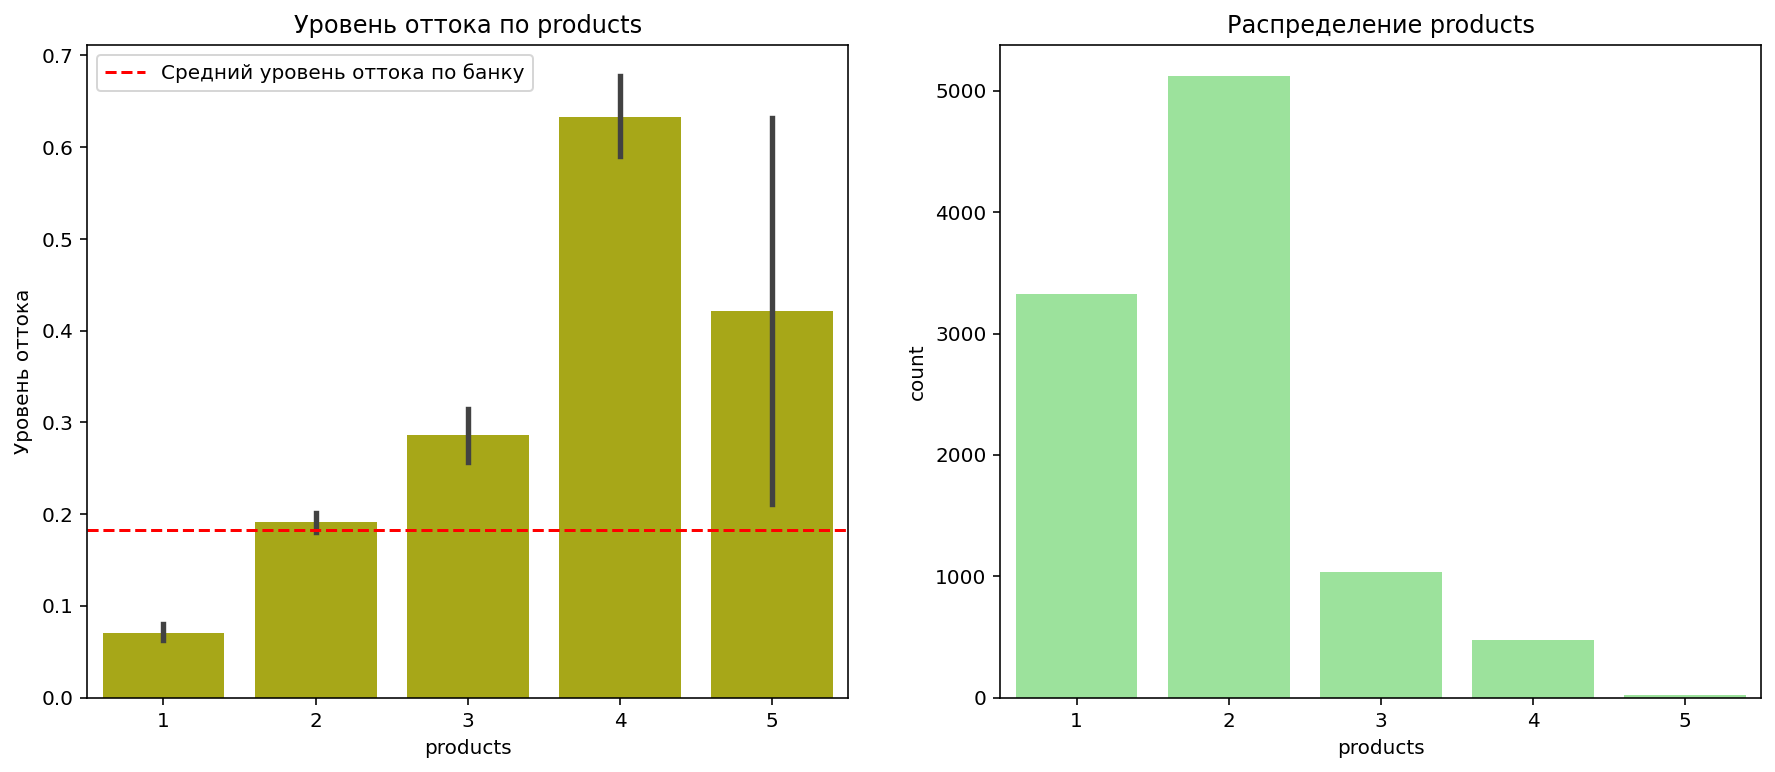

In [29]:
disc_graph(data[data['products']!=0], 'products')

Визуально, клиенты с количеством открытых продуктов, равным 3, 4 и 5 более склонны к оттоку, чем в среднем по банку. Самым отточным сегментом является 4, вслед за ним по отточности идут клиенты с 5 и 3 продуктами

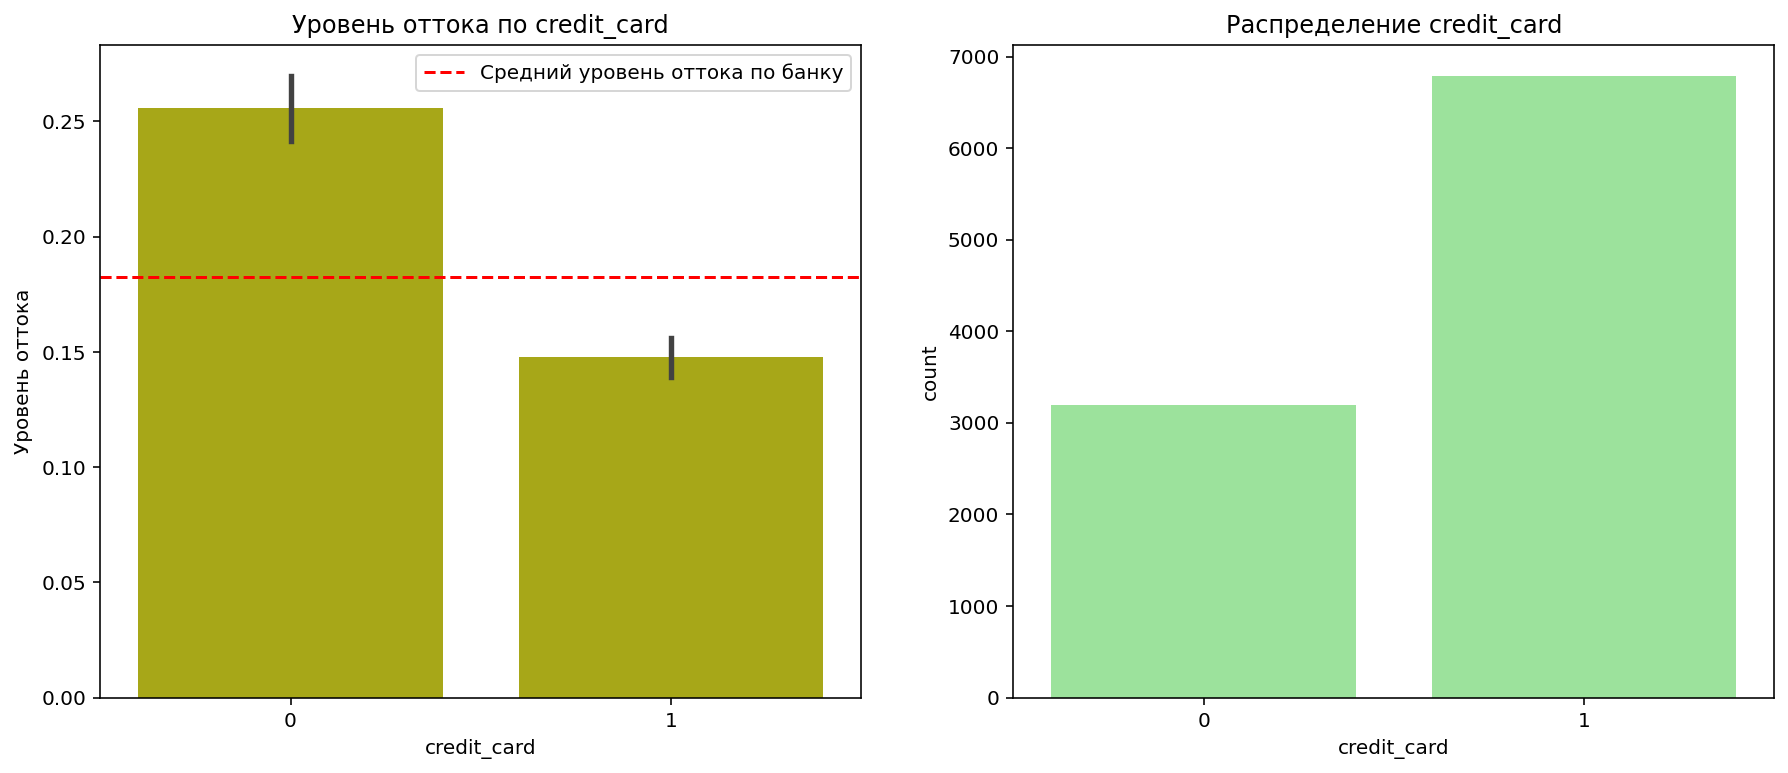

In [30]:
disc_graph(data, 'credit_card')

Визуально, клиенты без кредитной карты более склонны к оттоку, чем в среднем по банку

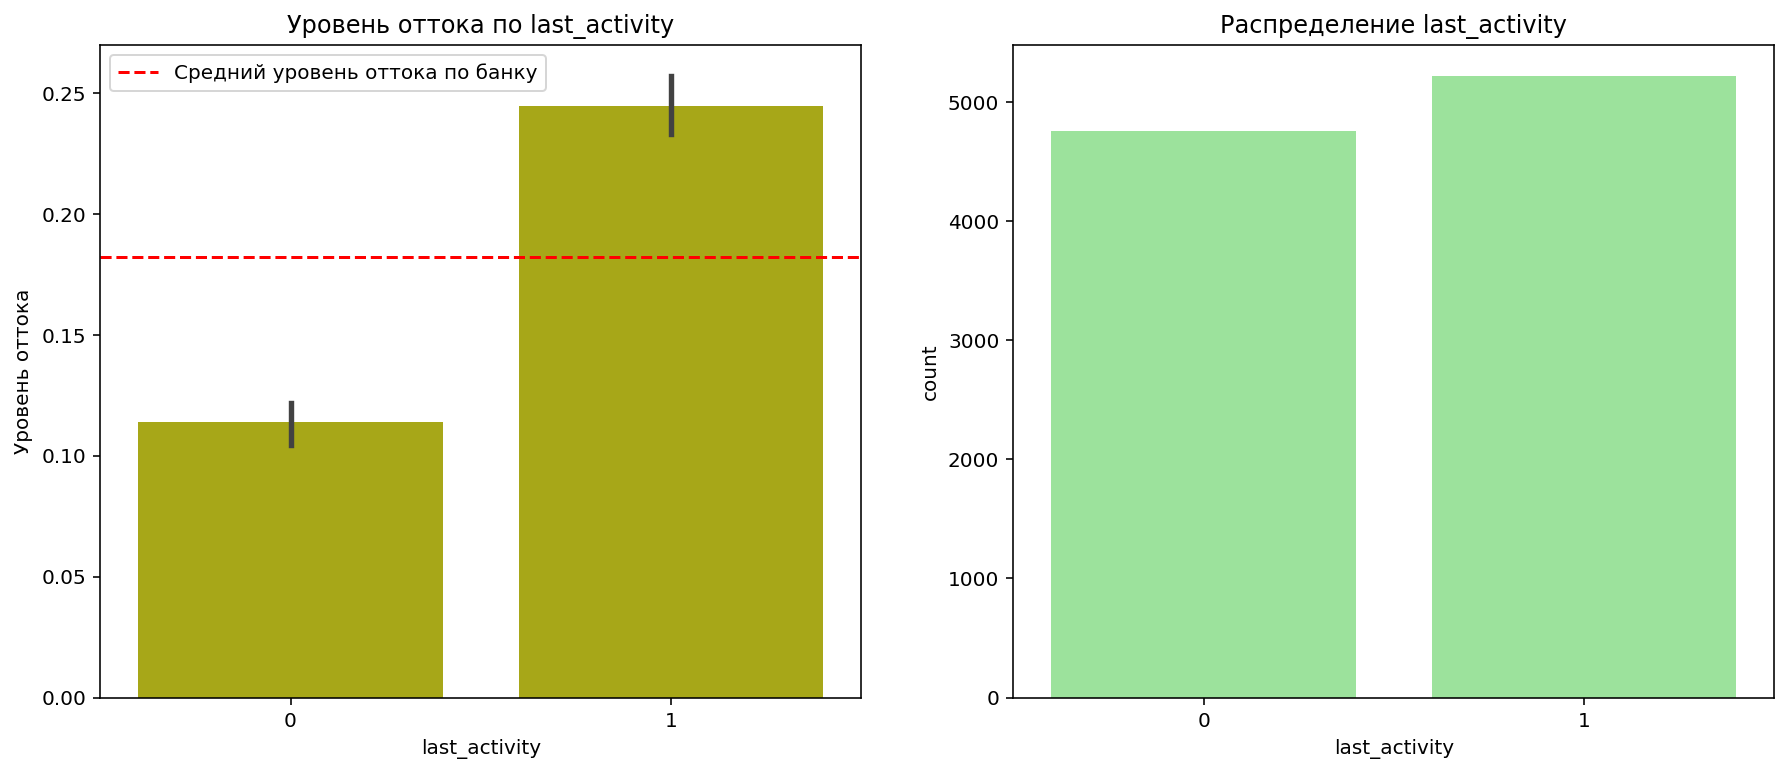

In [31]:
disc_graph(data, 'last_activity')

Визуально, клиенты с наличием операций за какой-то промежуток времени на момент анализа более склонны к оттоку, чем в среднем по банку. Распределение активных и неактивных клиентов различается не сильно. Можно интерпретировать это так: клиент с last_activity=0 и churn=0 имеют активный договор с банком, но при этом не пользуются его продуктами. Посчитаем, сколько таких клиентов

In [32]:
passive = data[(data['churn'] == 0) & (data['last_activity'] == 0)]
len(passive), len(passive)/len(data)*100

(4217, 42.27992781231201)

Таких "пассивных" клиентов 42% от общего числа клиентов

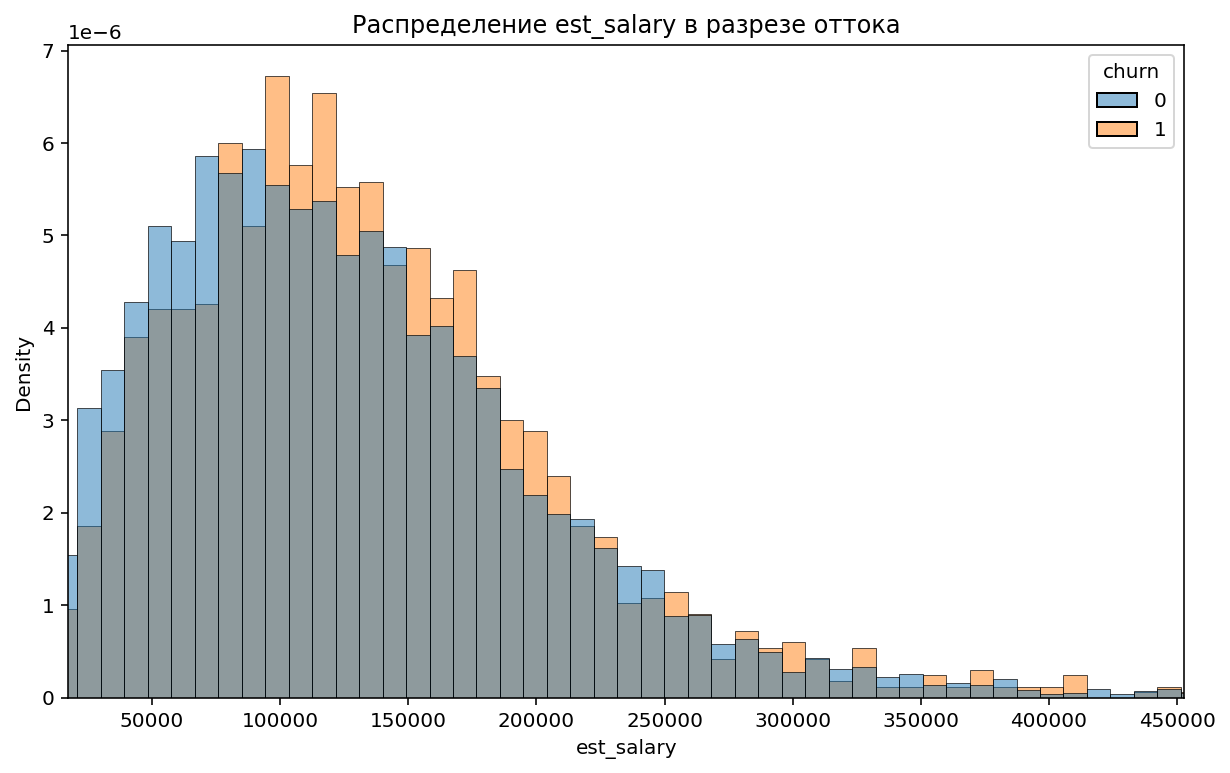

In [33]:
cont_graph(data, 'est_salary', [1, 97])

Визуально, клиенты с зп от 90к более склонны к оттоку почти на всех участках диаграммы распределения, сильнее всего отточность выражена на участке 90-210к 

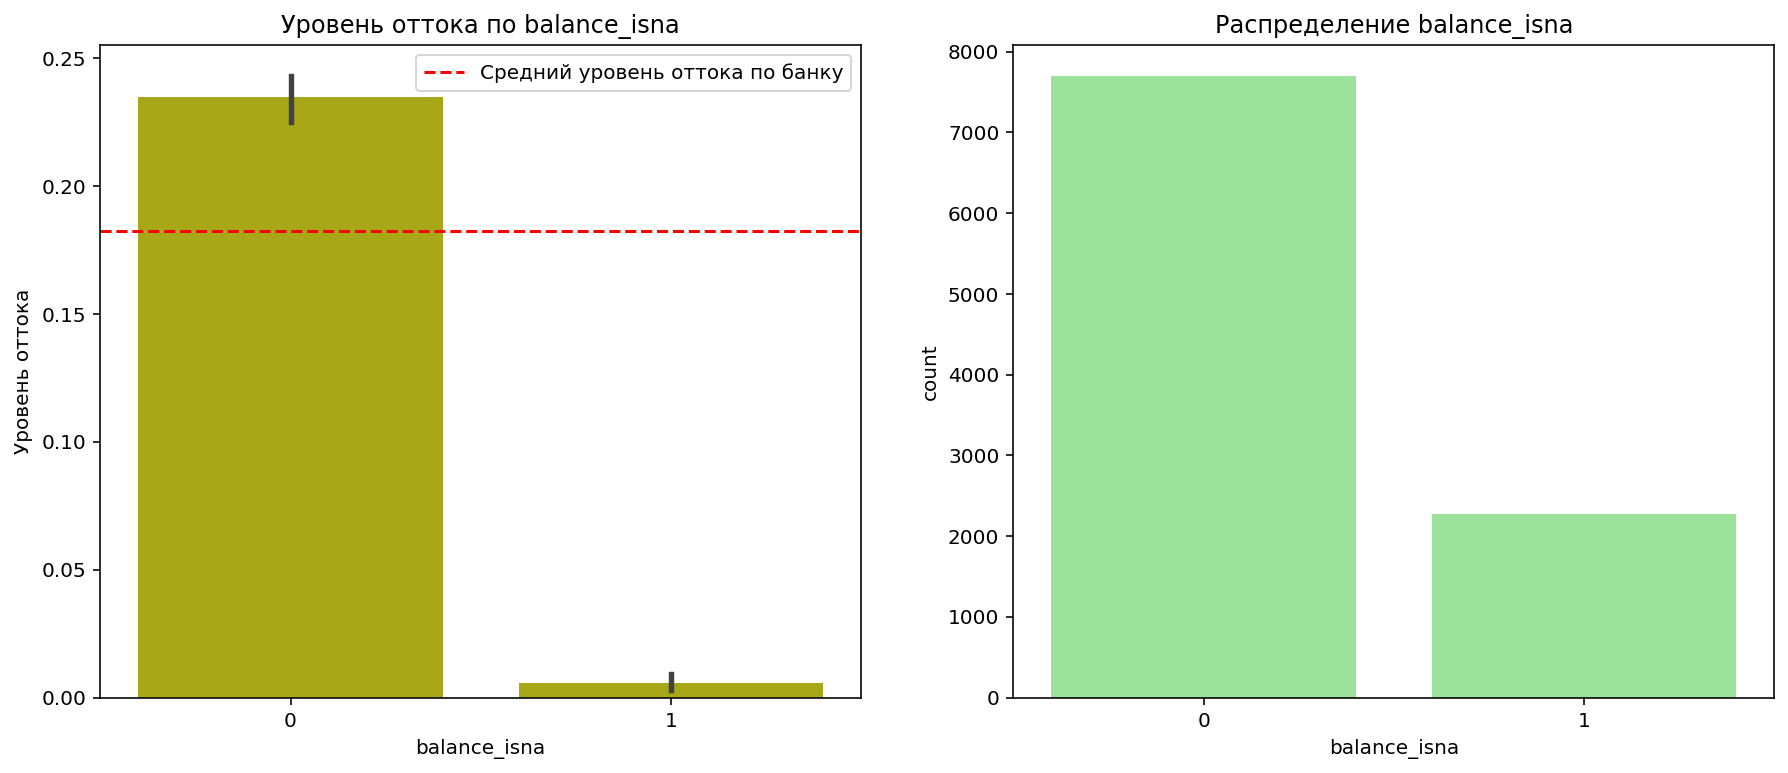

In [34]:
disc_graph(data, 'balance_isna')

Визуально, клиенты без пропусков в балансе гораздо более склонны к оттоку, чем все клиенты в среднем по банку

In [35]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isna
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374,0.228494
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172,0.419884
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000


В процессе EDA и визуализации уже было заметно, что в `balance` и `est_salary` присутствуют выбросы и приходилось устанавливать xlim, чтобы визуализация была нагляднее. Также это заметно по разнице среднего и медианы для этих столбцов  
  
Напишем функцию, которая будет строить боксплот для исходной колонки и боксплот с фильтрацией верхней границы по перцентилю в случае, если этот перцентиль указан

In [36]:
def box_graph(data, x, y, percentile=None):
    try:
        if percentile is not None:
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))
            
            sns.boxplot(data=data, x=x, y=y, ax=axs[0])
            axs[0].set_xlabel('Отток')
            axs[0].set_ylabel(y)
            axs[0].set_title(f'Боксплот для {y} в разрезе оттока')
    
            sns.boxplot(data=data, x=x, y=y, ax=axs[1])
            axs[1].set_xlabel('Отток')
            axs[1].set_ylabel(y)
            axs[1].set_ylim(0, np.percentile(data[y].dropna(), percentile))
            axs[1].set_title(f'Боксплот для {y} в разрезе оттока с фильтрацией выбросов до {percentile} перцентиля')
            
            plt.show()
        
        else:
            sns.boxplot(data=data, x=x, y=y)
            plt.xlabel('Отток')
            plt.ylabel(y)
            plt.title(f'Боксплот для {y} в разрезе оттока')
    
    except:
        print('Ошибка')

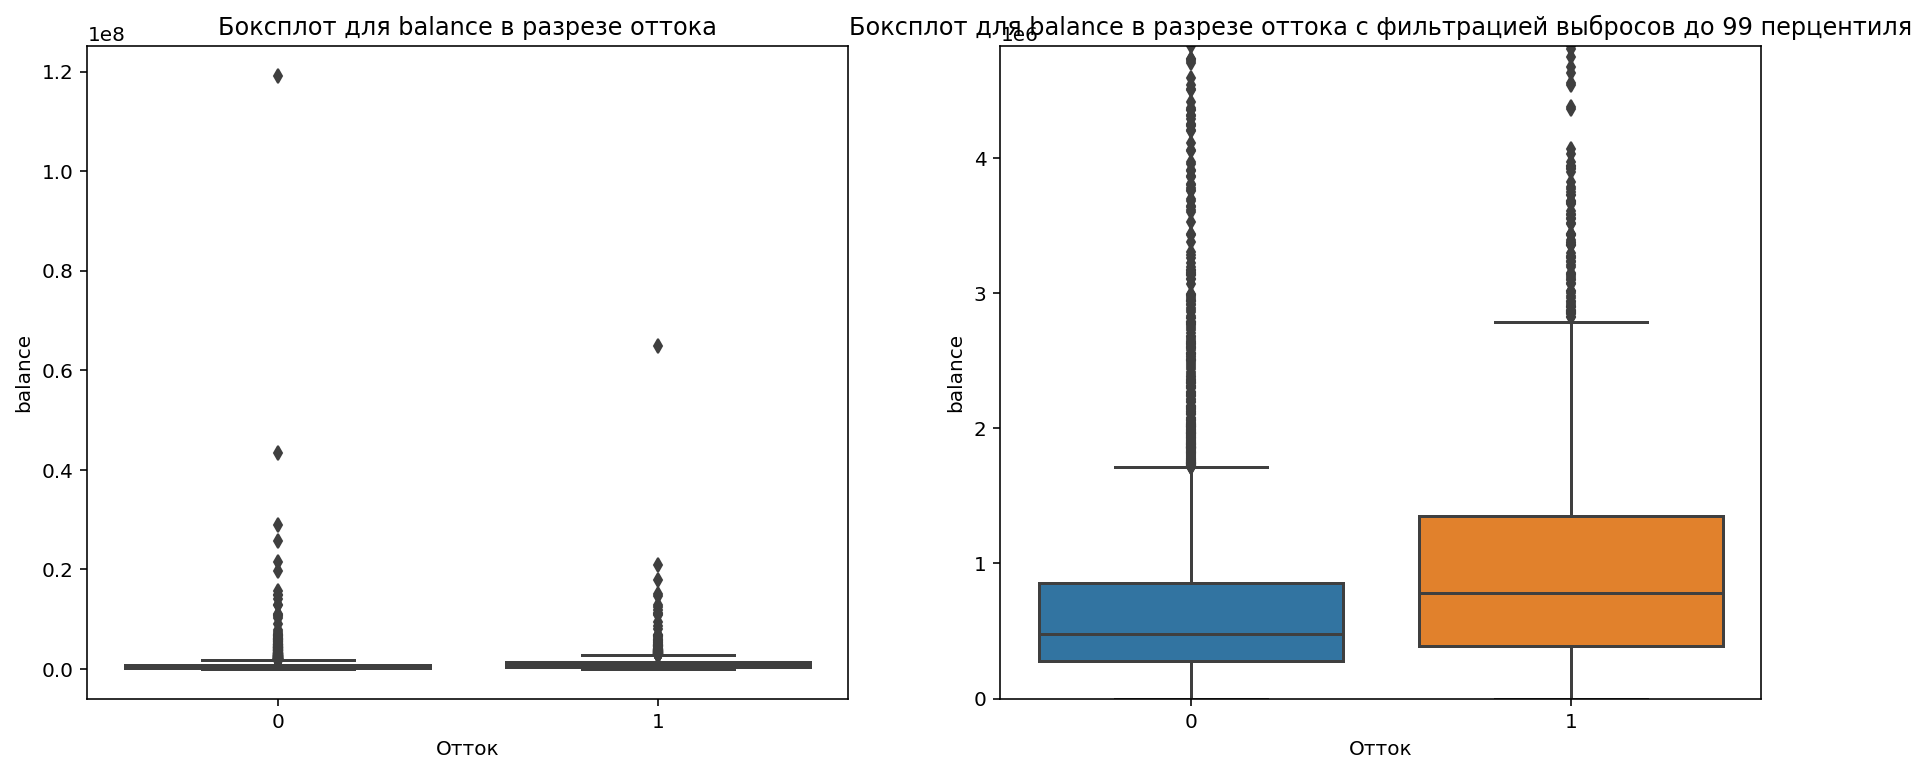

In [37]:
box_graph(data, 'churn', 'balance', 99)

С фильтрацией гораздо лучше

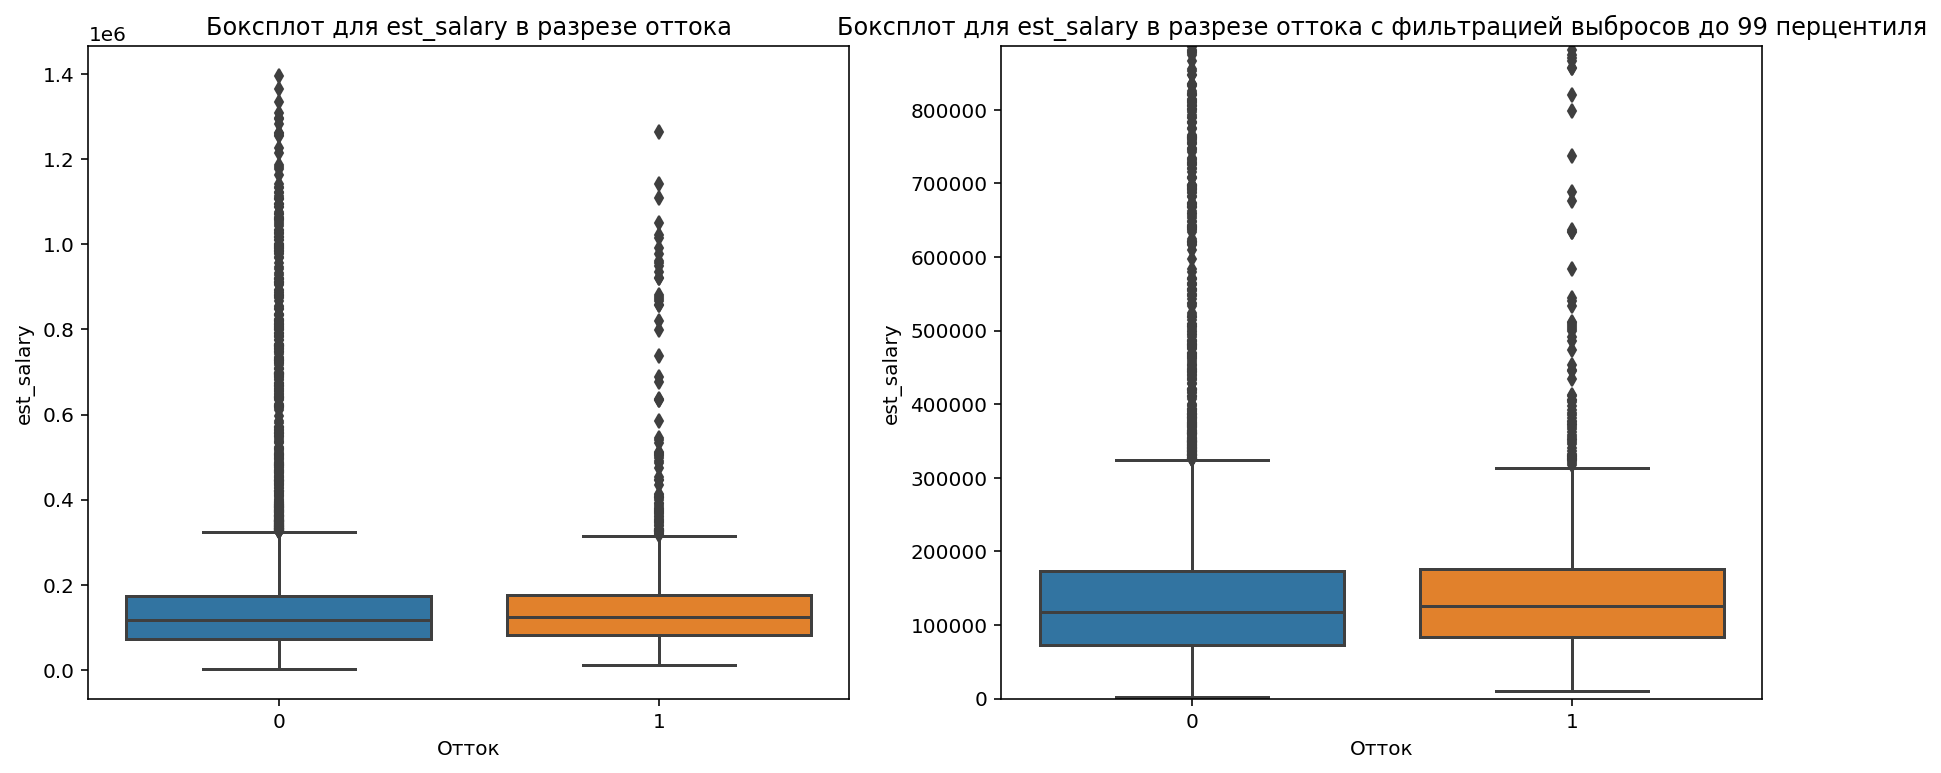

In [38]:
box_graph(data, 'churn', 'est_salary', 99)

Здесь разница также есть, но не такая значительная, в `est_salary` выбросы не настолько аномальные, как в `balance`  
  
Напишем функцию для фильтрации данных по верхнему перцентилю, чтоб впоследствии считать корреляцию по данным с меньшим количеством выбросов, чем в исходном датасете

In [39]:
def filter_data(data, rows, percentile):
    filtered = data.copy()
    for row in rows:
        filtered = filtered[filtered[row] < np.percentile(filtered[row].dropna(), percentile)]
    
    return filtered

Отфильтруем датасет по 99 перцентилю для колонок `est_salary` и `balance`

In [40]:
data_filtered = filter_data(data, ['est_salary', 'balance'], 99)

Посмотрим корреляцию по всем столбцам датасета

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable balance_isna for analysis 1. Dropping this column
  warnings.warn(


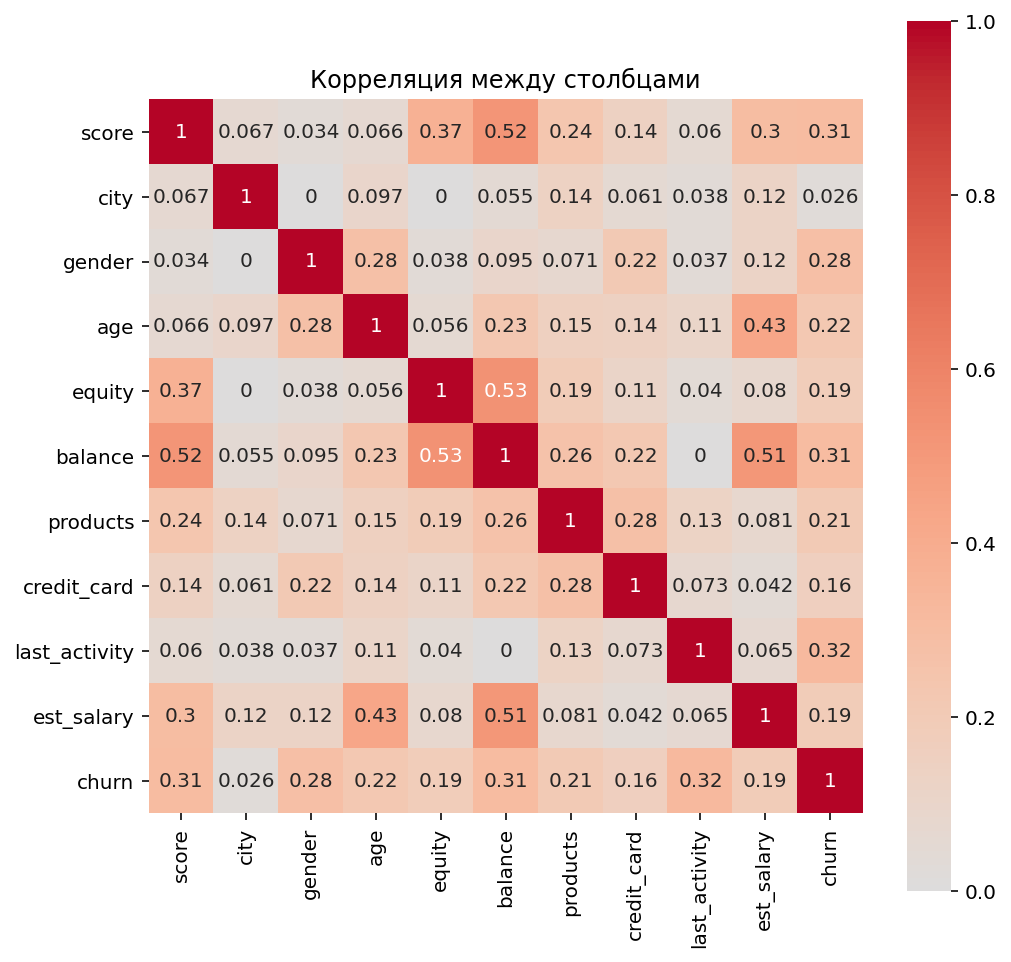

In [41]:
phik_graph(data_filtered, ['user_id'], ['score', 'balance', 'est_salary', 'age'])

**Умеренная кореляция:** кредитный рейтинг и баллы собственности, кредитный рейтинг и доход, кредитный рейтинг и удержание, возраст и доход, баланс и удержание, наличие активности и удержание  
**Заметная корреляция:** кредитный рейтинг и баланс, баллы собственности и баланс, баланс и доход

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable balance_isna for analysis 1. Dropping this column
  warnings.warn(


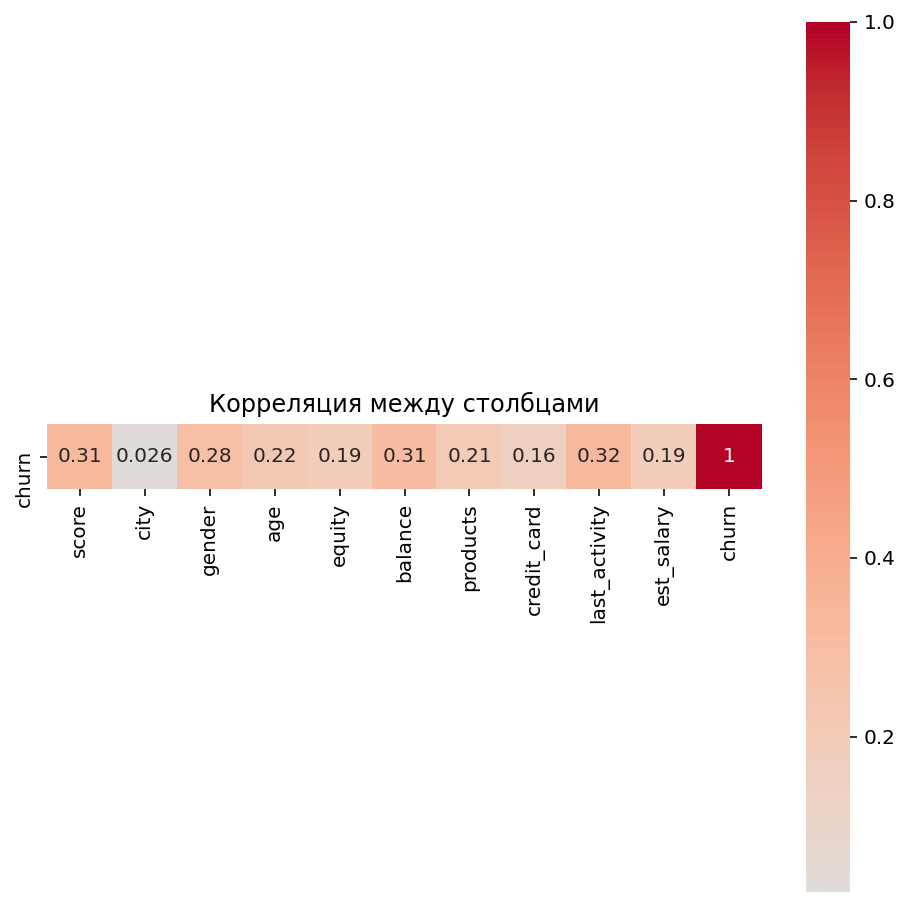

In [42]:
phik_graph(data_filtered, ['user_id'], ['score', 'balance', 'est_salary', 'age'], 'churn')

По оттоку  
**Нет корреляции**: с городом  
**Слабая корреляция**: пол (мужчины более склонны уходить, чем в среднем), возраст (некоторые сегменты), баллы собственности (чем больше, тем выше отток), количество продуктов банка (отток выше, чем в среднем по банку, для всех значений кроме 1 и 2), наличие кредитной карты (без кредитки более склонны уходить), доход (отток выше не оттока после определенного значения)  
**Умеренная корреляция**: кредитный рейтинг (некоторые сегменты), баланс (чем баланс, тем выше отток), наличие активности (активные уходят чаще, чем неактивные)

Создадим датасет вручную, чтобы составить портрет типичного уходящего и остающегося клиента

In [43]:
data_stay = data[data['churn'] == 0]
data_leave = data[data['churn'] == 1]

pivot_profile = {'Признак': ['Кредитный рейтинг', 'Город', 'Пол', 'Возраст', 'Балл объектов собственности',
                            'Баланс', 'Количество продуктов', 'Наличие кредитной карты', 'Наличие активности',
                            'Оценочный доход', 'Пропуски в балансе'],
                'Отток': [f"Среднее: {round(data_leave['score'].mean())}", f"Мода: {data_leave['city'].mode()[0]}",
                         f"Мода: {data_leave['gender'].mode()[0]}", f"Медиана: {data_leave['age'].median()}",
                         f"Медиана: {data_leave['equity'].median()}", f"Среднее: {round(data_leave['balance'].mean())}, Медиана: {round(data_leave['balance'].median())}",
                         f"Медиана: {data_leave['products'].median()}", f"Мода: {data_leave['credit_card'].mode()[0]}",
                         f"Мода: {data_leave['last_activity'].mode()[0]}",
                         f"Среднее: {round(data_leave['est_salary'].mean())}, Медиана: {round(data_leave['est_salary'].median())}",
                         f"Количество: {data_leave['balance_isna'].sum()}, это {round(data_leave['balance_isna'].sum()/len(data_leave)*100, 2)}% от датасета"],
                 'Не отток': [f"Среднее: {round(data_stay['score'].mean())}", f"Мода: {data_stay['city'].mode()[0]}",
                         f"Мода: {data_stay['gender'].mode()[0]}", f"Медиана: {data_stay['age'].median()}",
                         f"Медиана: {data_stay['equity'].median()}", f"Среднее: {round(data_stay['balance'].mean())}, Медиана: {round(data_stay['balance'].median())}",
                         f"Медиана: {data_stay['products'].median()}", f"Мода: {data_stay['credit_card'].mode()[0]}",
                         f"Мода: {data_stay['last_activity'].mode()[0]}",
                         f"Среднее: {round(data_stay['est_salary'].mean())}, Медиана: {round(data_stay['est_salary'].median())}",
                         f"Количество: {data_stay['balance_isna'].sum()}, это {round(data_stay['balance_isna'].sum()/len(data_stay)*100, 2)}% от датасета"],
                 'Относительная разница (для среднего)': [data_leave['score'].mean()/data_stay['score'].mean(),
                 None, None, None, None, data_leave['balance'].mean()/data_stay['balance'].mean(), None, None, None,
                 data_leave['est_salary'].mean()/data_stay['est_salary'].mean(), None]
                }

In [44]:
profile = pd.DataFrame(data=pivot_profile)
profile.fillna('-', inplace=True)
profile

,Признак,Отток,Не отток,Относительная разница (для среднего)
0,Кредитный рейтинг,Среднее: 863,Среднее: 845,1.021315
1,Город,Мода: Ярославль,Мода: Ярославль,-
2,Пол,Мода: М,Мода: Ж,-
3,Возраст,Медиана: 39.0,Медиана: 40.0,-
4,Балл объектов собственности,Медиана: 4.0,Медиана: 3.0,-
5,Баланс,"Среднее: 1134458, Медиана: 783909","Среднее: 733032, Медиана: 475410",1.547625
6,Количество продуктов,Медиана: 2.0,Медиана: 2.0,-
7,Наличие кредитной карты,Мода: 1,Мода: 1,-
8,Наличие активности,Мода: 1,Мода: 0,-
9,Оценочный доход,"Среднее: 148290, Медиана: 125395","Среднее: 147675, Медиана: 118228",1.004165


**Типичный активный клиент** имеет кредитный рейтинг 845, обслуживается в Ярославле, женщина 40 лет, с количеством объектов собственности эквивалентным баллу 3, средним балансом 733к и медианным 475к, с 2 открытыми продуктами, в том числе кредитной картой. У типичного активного клиента отсутствуют операции за последние несколько месяцев, его средний доход 147к, медианный - 118к.  
**Типичный ушедший клиент** имеет кредитный рейтинг 863, обслуживается также в Ярославле, мужчина 39 лет, с количеством объектов собственности эквивалентным баллу 4, средним балансом 1.13кк и медианным 783к, с 2 открытыми продуктами, в том числе кредитной картой. У типичного ушедшего клиента имеются операции за последние несколько месяцев, его средний доход 148, медианный - 125к. 

## Выводы по разделу: <a id="step3r"></a> 
 - **Кредитный рейтинг:** клиенты с рейтингом 820-910 более склонны к оттоку (умеренная корреляция)
 - **Город:** клиенты из Ярославля и Ростова склонны к оттоку чуть более, чем в среднем по банку (корреляция не выявлена)
 - **Пол:** мужчины заметно более склонны к оттоку, чем в среднем по банку (слабая корреляция)
 - **Возраст:** клиенты возрастом 25-35 и 50-60 более склонны к оттоку (слабая корреляция)
 - **Баллы собственности:** чем больше у клиента объектов собственности, тем более он склонен к оттоку (слабая корреляция)
 - **Баланс:** клиенты с балансом от 700к более склонны к оттоку (умеренная корреляция)
 - **Продукты:** Клиенты с 3+ продуктами являются более отточными, чем в среднем по банку (слабая корреляция) 
 - **Кредитка:** клиенты без кредитки более склонны к оттоку, чем в среднем по банку (слабая корреляция)
 - **Активность:** активные клиенты более склонны к оттоку, чем неактивные (умеренная корреляция). Неактивных клиентов с открытым договором 4217, это 42% от общего числа всех клиентов в датасете 
 - **Доход:** клиенты с доходом от 90к более склонны к оттоку, сильнее всего отточность выражена на участке 90-210к (умеренная корреляция)
 - **Пропуски в балансе:** очень высокая корреляция между пропусками и баллами объектов собственности, высокая между пропусками и количеством открытых продуктов, кредитным рейтингом
 - **Другие заметные корреляции:** кредитный рейтинг и баланс, баллы собственности и баланс, баланс и доход
 - **Типичный ушедший клиент** имеет средний рейтинг больше в 1.02 раза, средний баланс больше в 1.5 раза и оценочный доход больше в 1.004 раза, чем типичный оставшийся клиент. Также типичный ушедший - это активный клиент, мужчина 39 лет с 4 баллами собственности, а типичный оставшийся - пассивный клиент, женщина 40 лет с 3 баллами собственности
 - **Пассивные клиенты**, т.е. клиенты, имеющие активный договор с банком, но при этом без действий по счету за последнее время составляют 42% от общего числа клиентов в базе, кажется, с этим нужно что-то делать

# Проверка статистических гипотез<a id="step4"></a> 

Мы можем использовать ttest для проверки гипотез о равенстве среднего так как:  
1) Выборки не зависят друг от друга  
2) Согласно ЦПТ, выборочные средние генеральной совокупности распределены нормально  
3) Дисперсии могут быть не равны, как и размеры выборок, но мы будем использовать параметр `equal_var` = False  
4) Выборки достаточно большие  
5) t-тест чувствителен к выбросам, которые могут существенно влиять на результаты теста. Поэтому перед применением t-теста мы удалим или обработаем выбросы, чтобы минимизировать их влияние на результаты.

Посмотрим, насколько сильно различается количество данных ушедших и оставшихся клиентов

In [45]:
len(data_leave), len(data_stay), len(data_leave)/len(data_stay)

(1819, 8155, 0.22305334150827713)

Ho - средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались  
H1 - средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались

Отфильтруем выбросы в доходе по 99 перцентилю

In [46]:
salary_filtered = filter_data(data, ['est_salary'], 99)

salary_leave = salary_filtered[salary_filtered['churn'] == 1]
salary_stay = salary_filtered[salary_filtered['churn'] == 0]

Построим боксплот для salary_leave, для этого воспользуемся старой функцией

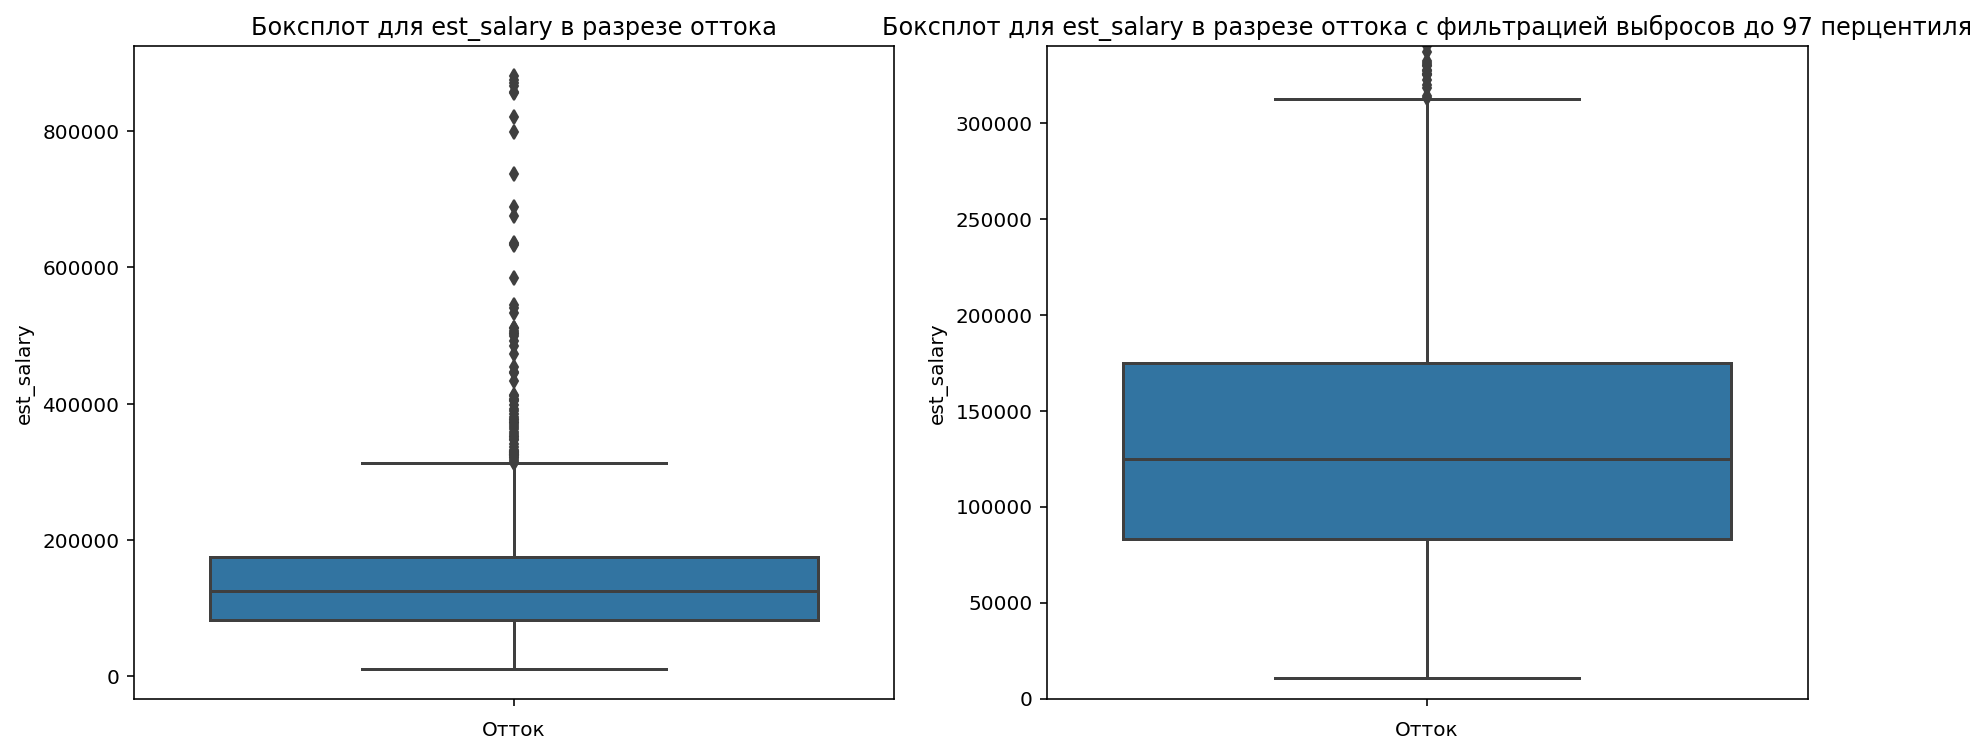

In [47]:
box_graph(salary_leave, x=None, y='est_salary', percentile=97)

Увидим, что есть выбросы, оптимальным значением перцентиля для фильтрации является 97. Аналогично с salary_stay:

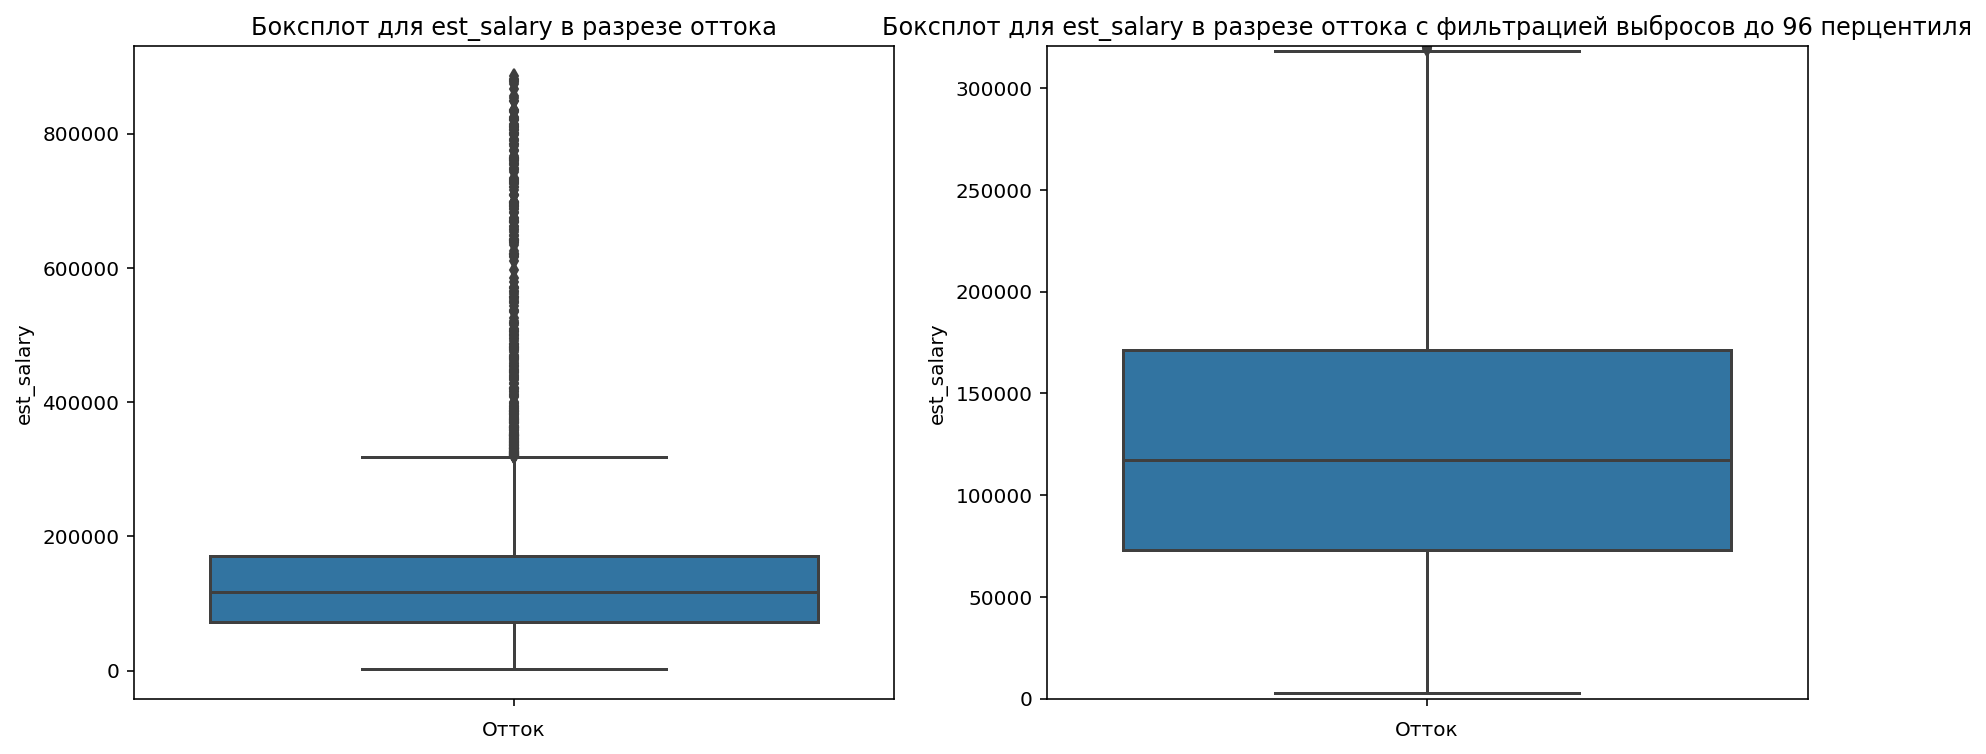

In [48]:
box_graph(salary_stay, x=None, y='est_salary', percentile=96)

Тут оптимальным является 96 перцентиль. Произведем фильтрацию датасетов:

In [49]:
salary_leave = filter_data(data_leave, ['est_salary'], 97)
salary_stay = filter_data(salary_stay, ['est_salary'], 96)

Напишем функцию для рассчета т-теста и рассчитаем его для наших данных. Я выбрал уровень значимости 0.05, поскольку он является общепринятым стандартом в различного рода исследованиях, не требующих чрезвычайной точности. `equal_var` ставим False, поскольку выборки разного размера 

In [50]:
def ttest_check(first, second, alternative='two-sided', equal_var=True, alpha=0.05):
    
    print(f'Среднее первой выборки: {first.mean()}, среднее второй выборки: {second.mean()}')
    
    results = st.ttest_ind(first, second, alternative=alternative, equal_var=equal_var)

    print(f'p-value: {results.pvalue}')

    if results.pvalue < alpha:
        print(f'На уровне значимости {alpha} отвергаем нулевую гипотезу')
    else:
        print(f'На уровне значимости {alpha} нет оснований отвергнуть нулевую гипотезу')

In [51]:
ttest_check(salary_leave['est_salary'], salary_stay['est_salary'], equal_var=False)

Среднее первой выборки: 131661.3339909297, среднее второй выборки: 121942.94870901109
p-value: 4.224683322935097e-08
На уровне значимости 0.05 отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу о том, что средний доход ушедших клиентов равен среднему доходу оставшихся клиентов

Ho - средний возраст клиентов, которые ушли, равен среднему возраста клиентов, которые остались  
H1 - средний возраст клиентов, которые ушли, меньше среднего возраста клиентов, которые остались

Здесь так же применим ttest с теми же параметрами, фильтровать возраст не будем, поскольку в нем нет выбросов (убедились в этом на этапе EDA)

In [52]:
ttest_check(data_leave['age'], data_stay['age'], alternative='less', equal_var=False)

Среднее первой выборки: 41.450247388675095, среднее второй выборки: 43.02084610668302
p-value: 5.860828426939773e-08
На уровне значимости 0.05 отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу о том, что средний возраст ушедших клиентов равен среднему возрасту оставшихся клиентов. Можем предположить, что средний возраст ушедших клиентов меньше среднего возраста оставшихся клиентов

## Выводы по разделу:<a id="step4r"></a> 
 - Можем отвергнуть нулевую гипотезу о том, что средний доход ушедших клиентов равен среднему доходу оставшихся клиентов
 - Можем отвергнуть нулевую гипотезу о том, что средний возраст ушедших клиентов равен среднему возрасту оставшихся клиентов. Можем предположить, что средний возраст ушедших клиентов меньше среднего возраста оставшихся клиентов

# Подведение промежуточных итогов<a id="step5"></a> 

На этом этапе мы выберем признаки, которые лягут в основу будущей сегментации отточных клиентов, при подборе признаков я буду ориентироваться на EDA, корреляционный анализ и проверенные гипотезы  
 - **Кредитный рейтинг:** 830-900 (умеренная корреляция)
 - **Кредитная карта:** клиенты без кредитки более склонны к оттоку (слабая корреляция)
 - **Пол:** мужчины (слабая корреляция)
 - **Возраст:** 25-35 (слабая корреляция + с учетом проверки гипотез можем предположить, что средний возраст ушедших клиентов (41.45) ниже среднего возраста оставшихся (43))
 - **Баланс:** от 700к (умеренная корреляция)
 - **Баллы собственности:** 4+ (слабая корреляция)

# Сегментация<a id="step6"></a> 

In [53]:
avg_churn = data['churn'].mean()

In [54]:
segment1 = data[(data['score'] >= 830) & (data['score'] <= 900) & (data['credit_card'] == 0)]
len(segment1), segment1['churn'].mean(), avg_churn

(1399, 0.32451751250893496, 0.18237417284940846)

1 сегмент: **Кредитный рейтинг** от 830 до 900 баллов + отсутствие кредитной карты в нашем банке, надежные заемщики, активно пользуются различными кредитными продуктами и возвращают деньги точно в срок, без просрочек и досрочных погашений, при этом не пользуются нашей кредиткой. 1399 клиентов, отток 32% при среднем 18%

In [55]:
segment2 = data[(data['gender'] == 'М') & (data['age'] >= 25) & (data['age'] <= 35)]
len(segment2), segment2['churn'].mean(), avg_churn

(1780, 0.2550561797752809, 0.18237417284940846)

2 сегмент: **Демография**, мужчины от 25 до 35 лет, работающая экономически активная группа, предпочитают пользоваться интернетом. 1780 клиентов, отток 25.5% при среднем 18%

In [56]:
segment3 = data[(data['balance'] >= 700000) & (data['equity'] >= 4)]
len(segment3), segment3['churn'].mean(), avg_churn

(2140, 0.3579439252336449, 0.18237417284940846)

3 сегмент: **Благосостояние**, баланс от 700к и количество баллов собственности от 4, имеют стабильный активный и/или пассивный доход, владеют движимыми и недвижимыми объектами имущества. 2140 клиентов, отток 36% при среднем 18%

# Приоритизация сегментов<a id="step7"></a> 

Приоритизируем сегменты по уровню оттока, создадим датафрейм и отсортируем его по убыванию отточности каждого сегмента. Также добавим столбец с разницей в % между сегментом и средним оттоком по банку

In [57]:
avg_churn = round(avg_churn*100, 2)

In [58]:
segments = {'Сегмент': ['Кредитный рейтинг', 'Демография', 'Благосостояние'],
           'Отток': [f"{round(segment1['churn'].mean()*100, 2)}%", f"{round(segment2['churn'].mean()*100, 2)}%",
                    f"{round(segment3['churn'].mean()*100, 2)}%"],
            'Размер сегмента': [len(segment1), len(segment2), len(segment3)],
           'Дельта': [round(segment1['churn'].mean()*100, 2)-avg_churn, round(segment2['churn'].mean()*100, 2)-avg_churn,
                      round(segment3['churn'].mean()*100, 2)-avg_churn]}

In [59]:
segments_table = pd.DataFrame(data=segments)
segments_table.sort_values(by='Отток', ascending=False).reset_index(drop=True)

,Сегмент,Отток,Размер сегмента,Дельта
0,Благосостояние,35.79%,2140,17.55
1,Кредитный рейтинг,32.45%,1399,14.21
2,Демография,25.51%,1780,7.27


# Формирование рекомендаций<a id="step8"></a> 

1) **Благосостояние - клиенты с балансом от 700к и количеством баллов собственности от 4, имеют стабильный активный и/или пассивный доход, владеют движимыми и недвижимыми объектами имущества. 2140 клиентов, отток 36% при среднем 18%.**  
  Рекомендуется:
   - При рекламе для этого сегмента сделать упор на фичи банка, позволяющие получать доход на остаток на балансе, либо по накопительным счетам и вкладам. Эти люди судя по всему имеют много свободных денег и хотят, чтобы они приносили доход. Можно подключить этому сегменту повышенную промо процентную ставку на первые 1-3 месяца по новым открытым накопительным счетам. 
   - При рекламе кредитных продуктов для этого сегмента сделать упор на займы под залог различной собственности (недвижимость, автомобиль) с пониженной процентной ставкой либо повышенной суммой займа.
   - Клиенты с большим балансом и количеством объектов собственности с высокой долей вероятностью могут заниматься предпринимательской деятельностью, можно проверить эту гипотезу и, если она подтвердится, сделать упор на банковские продукты для бизнеса (эквайринг, зарплатный проект, и т.д.).
   - Формирование образа надежного и клиентоориентированного банка, которому можно доверять свои деньги. 
  
2) **Кредитный рейтинг - 830 до 910 баллов + нет кредитки в нашем банке, надежные заемщики, активно пользуются различными кредитными продуктами и возвращают деньги точно в срок, без просрочек и досрочных погашений, при этом не пользуются нашей кредиткой. 1399 клиентов, отток 32% при среднем 18%**  
  Рекомендуется:
   - При рекламе кредитных продуктов банка (кредиты, рассрочки) сделать упор на выгодных условиях кредитования для надежных заемщиков, высылать пуш-уведомления и иными способами повышать информированность 
   - Почти все БКИ размещают рекламу на своих сайтах, договориться о рекламе для пользователей на сайте БКИ конкретно для этого сегмента с кредитным рейтингом 830-910 баллов
   - Провести рекламную кампанию для кредитных карт, возможно пересмотреть условия для надежных заемщиков и предложить различные плюшки (бесплатное обслуживание на год, 365 дней без процентов (со звездочками в договоре), кэшбек рублями или милями по кредитным картам)
   - Реклама различных ипотечных продуктов, разработка решения "под ключ": ипотека + сопровождение сделки + ипотечный калькулятор, предложение прозрачных условий по ипотеке и страховкам 
    
3) **Демография - мужчины от 25 до 35 лет, работающая экономически активная группа, предпочитают пользоваться интернетом. 1780 клиентов, отток 25.5% при среднем 18%**  
  Рекомендуется:
   - Сделать фокус на рекламе в интернете, преимущественно нативной на различных узкоспециализированных профессиональных порталах (например с тематикой авто, технологии) и в телеграм каналах с описанной выше демографией. 
   - Формирование позитивного образа банка посредством положительных отзывов на тематических сайтах (банки.ру и т.д.), процент положительных отзывов можно увеличить, если предложить лояльным клиентам небольшое вознаграждение за отзыв, успешно прошедший модерацию.
   - Предложить привлекательные условия при переводе зарплаты в наш банк (например дополнительная категория кэшбека, бесплатное обслуживание по кредитной карте, и  т.д.)
   - Повышение юзабилити мобильного приложения, проведение A/B и других тестов, разработка и повышение юзабилити веб-версии (в том случае, если приложение банка недоступно в AppStore в связи с санкциями)